# **Projet IA pour `HumanForYou`**

<div>
<img src="cesi_logo2.png" width="150"/>
</div>

|Auteurs|Promo|Date|
|---|---|---|
|LANDEMARRE Hadrien, PETRO Tayana, SEURIN Alexis|FISE INFO A4 Nanterre|16/03/2023|



## **Introduction**

L’entreprise indienne de produits pharmaceutiques *HumanForYou* a constaté qu’environ **15 % de ses employés quittent l’entreprise chaque année**. Il s’agit d’une **vague de turn-over récurrente** qui doit être résolue et ne plus être aussi importante.

La direction de cette entreprise a identifié des conséquences directes suite à ce turn-over. Elle souligne notamment des projets qui prennent dorénavant du retard suite aux départs des employés, ce qui nuit à sa réputation auprès de ses clients et de ses partenaires commerciaux.

De plus, l’arrivée de nouveaux employés ont besoin de temps pour être formés et être opérationnels. 

Grâce à notre expertise en tant que spécialistes de l’analyse de données, la direction de l’entreprise a besoin de notre équipe pour **déterminer les facteurs ayant le plus d’influence sur ce taux de turn-over** et de **proposer des modèles** qui permettraient d’avoir des pistes d’amélioration pour donner à leurs employés l’envie de rester.

La problématique que nous traiterons dans ce rapport est la suivante :  **Comment réduire le taux de « turn-over » et améliorer la fidélité des employés à leur entreprise ?**

Pour y répondre, nous allons passer par différentes étapes majeures mettant en évidence notre démarche pouvant aboutir au résultat souhaité.

#### ***Un turn-over élevé a un impact significatif sur la cohésion et le climat social de l’entreprise. Nous cherchons à comprendre les raisons de ce turn-over élevé permet d’envisager les actions correctives. L’intelligence artificielle permet donc de fournir des informations en temps réel, d’identifier les causes des démissions passées et à venir et d’anticiper la prise de décisions.***

### Objectifs

Dans le cadre de ce Notebook, nous allons suivre les étapes suivantes :

- la génération de votre/vos jeux de données en justifiant les choix et les traitements effectués pour faire face aux problématiques classiques de ce type de travail.

- le choix d'un ou de plusieurs algorithmes d'IA retenu(s).

- l'analyse des résultats obtenus et leur interprétation en s'appuyant sur des métriques.

- La démarche mise en œuvre pour améliorer un modèle.

- le choix du modèle retenu au final parmi les différents essais effectués en justifiant pas rapport au besoin de votre client et des métriques.

- vos propositions finales justifiées

### Mesure de performance

Elle n'interviendra que dans le notebook suivant, celà dit, il convient d'avoir une idée des objectifs dès le début de projet. 

On s'intéressera à terme à la minimisation de la [_root mean square error (RMSE)_](https://en.wikipedia.org/wiki/Root-mean-square_deviation) et/ou de à la [_mean absolute error (MAE)_](https://en.wikipedia.org/wiki/Mean_absolute_error) de notre modèle :

$$
\newcommand\x{\mathbf{x}}
\newcommand\X{\mathbf{X}}
\newcommand\y{\mathbf{y}}
\newcommand\Y{\mathbf{Y}}
\newcommand\RMSE{\mbox{RMSE}}
\newcommand\MAE{\mbox{MAE}}
$$
$$
\RMSE(\X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}{(h(\x^{(i)})-y^{(i)})^2}}
$$

$$
\MAE(\X,h)=\frac{\sum_{i=1}^{m}{\lvert h(\x^{(i)})-y^{(i)})\rvert}}{m}
$$

$h$ étant la fonction de prédiction du modèle.


### Préparation de l'environnement

Ci-dessous quelques imports et précautions préalables à notre travail. Il n'est pas inutile de les parcourir.
Si nécessaire créer un bloc au démarrage pour installer toutes les librairies nécessaires en exécutant chacune leur tour les commandes suivantes:

In [595]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [596]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [597]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [598]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [599]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [698]:
#imports
import numpy as np
import os
from numpy.random import default_rng
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')

In [601]:
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# Figures dans le notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Localisation du lieu de sauvegarde des figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = (PROJECT_ROOT_DIR, "IA", CHAPTER_ID) # le dossier doit exister


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## **1. Préparation des données**

Il convient d'automatiser l'import des données.

In [602]:
#Permet de créer le dossier qui va grouper les différents fichiers (à améliorer) 
GENERAL_DATA_PATH = os.path.join("datasets", "general_data")

if not os.path.isdir(GENERAL_DATA_PATH):
    os.makedirs(GENERAL_DATA_PATH)
    

### Chargement des données en mémoire

De même, on va créer une fonction utilisant [`pandas`](https://pandas.pydata.org/) qui charge les données en mémoire dans un [`Pandas DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame).

In [603]:
# Permet de mettre les fichiers dans des variables puis dans des DataFrame 


general_data = pd.read_csv("datasets/general_data/general_data.csv")
employee_survey_data = pd.read_csv("datasets/general_data/employee_survey_data.csv")
manager_survey_data = pd.read_csv("datasets/general_data/manager_survey_data.csv")
in_time_data = pd.read_csv("datasets/general_data/in_out_time/in_time.csv")
out_time_data = pd.read_csv("datasets/general_data/in_out_time/out_time.csv")

Df_general_data = pd.DataFrame(general_data)
Df_employee_survey_data = pd.DataFrame(employee_survey_data)
Df_manager_survey_data = pd.DataFrame(manager_survey_data)
Df_in_time_data = pd.DataFrame(in_time_data)
Df_out_time_data = pd.DataFrame(out_time_data)

In [604]:
# Permet de remplacer les données manquantes dans in_out_time par des 0
Df_in_time_data.fillna(0, inplace = True)
Df_out_time_data.fillna(0, inplace = True)


Df_in_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,0.0,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,0.0,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,0.0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,0.0,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,0.0,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,0.0,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,0.0,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,0.0,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,0.0,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [605]:
#Copy of both dataframe
Df_in_time_dataCpy = Df_in_time_data.copy()
Df_out_time_dataCpy = Df_out_time_data.copy()
#Convert the time text into time
for k in range(1,len(Df_in_time_dataCpy.columns)):
    Df_in_time_dataCpy[Df_in_time_dataCpy.columns[k]] = pd.to_datetime(Df_in_time_dataCpy[Df_in_time_dataCpy.columns[k]], format='%Y-%m-%d %H:%M:%S')
for k in range(1,len(Df_out_time_dataCpy.columns)):
    Df_out_time_dataCpy[Df_out_time_dataCpy.columns[k]] = pd.to_datetime(Df_out_time_dataCpy[Df_out_time_dataCpy.columns[k]], format='%Y-%m-%d %H:%M:%S')



Df_in_time_dataCpy.head(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [606]:
# Soustraction des dataframes in_time_dataCpy et out_time_dataCpy
Df_time_data = Df_out_time_dataCpy.subtract(Df_in_time_dataCpy)

## Suppression de Unnamed 
Df_time_data = Df_time_data.drop("Unnamed: 0", axis=1)
Df_time_data.head(5)

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [607]:
## remplacement des données 0 days en nan 
Df_time_data_Cpy = Df_time_data.replace('0 days', np.nan)

## Moyenne des différentes lignes
mean_time_data = Df_time_data_Cpy.mean(axis=1)

## ajout de EmployeeID et de modification de la valeur meanWorkingTime
meanWorkingTime = pd.DataFrame({'EmployeeID':mean_time_data.index+1,'MeanWorkingTime':mean_time_data.values})
meanWorkingTime['MeanWorkingTime']=meanWorkingTime['MeanWorkingTime']/np.timedelta64(1, 'h')

meanWorkingTime.head(5)

,EmployeeID,MeanWorkingTime
0,1,7.373651
1,2,7.718969
2,3,7.013240
3,4,7.193678
4,5,8.006175


In [608]:

# Permet rassembler les différents dataframes en un seul dataframe 
Merged_data = pd.merge(Df_general_data, Df_employee_survey_data)
Merged_data = pd.merge(Merged_data, Df_manager_survey_data)
Merged_data = pd.merge(Merged_data, meanWorkingTime)



### Coup d'oeil

1. Observons les premières lignes de notre `DataFrame` avec la méthode [`head()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html?highlight=head):

In [609]:
#rendu des  différentes variables 
Merged_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,8.006175


2. Utilisons maintenant [`info()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info) pour obtenir une description du jeu de données :

In [610]:
# Taille des jeux de données par colonne
Merged_data.info(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

3. La fonction [`value_count()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html?highlight=value_count) permet de connaître, par exemple, le nombre de valeurs différentes d'une [`Series`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) telle que `ocean_proximity`, qui semble être catégorielle:

In [611]:
## PAS IMPORTANT
print(Merged_data['NumCompaniesWorked'])
#Merged_data.value_counts('Age')

0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: NumCompaniesWorked, Length: 4410, dtype: float64


4. La méthode `describe()` permet enfin d'obtenir un résumé statistique des valeurs numériques :

In [612]:
#résumé statistique des valeurs numériques
Merged_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741,7.700792
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742,1.340218
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.950504
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.673333
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.406761
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,8.368703
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,11.030960


5. On peut utiliser la fonction [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) et [`matplotlib`](https://matplotlib.org/) pour afficher un histogramme par attribut numérique.

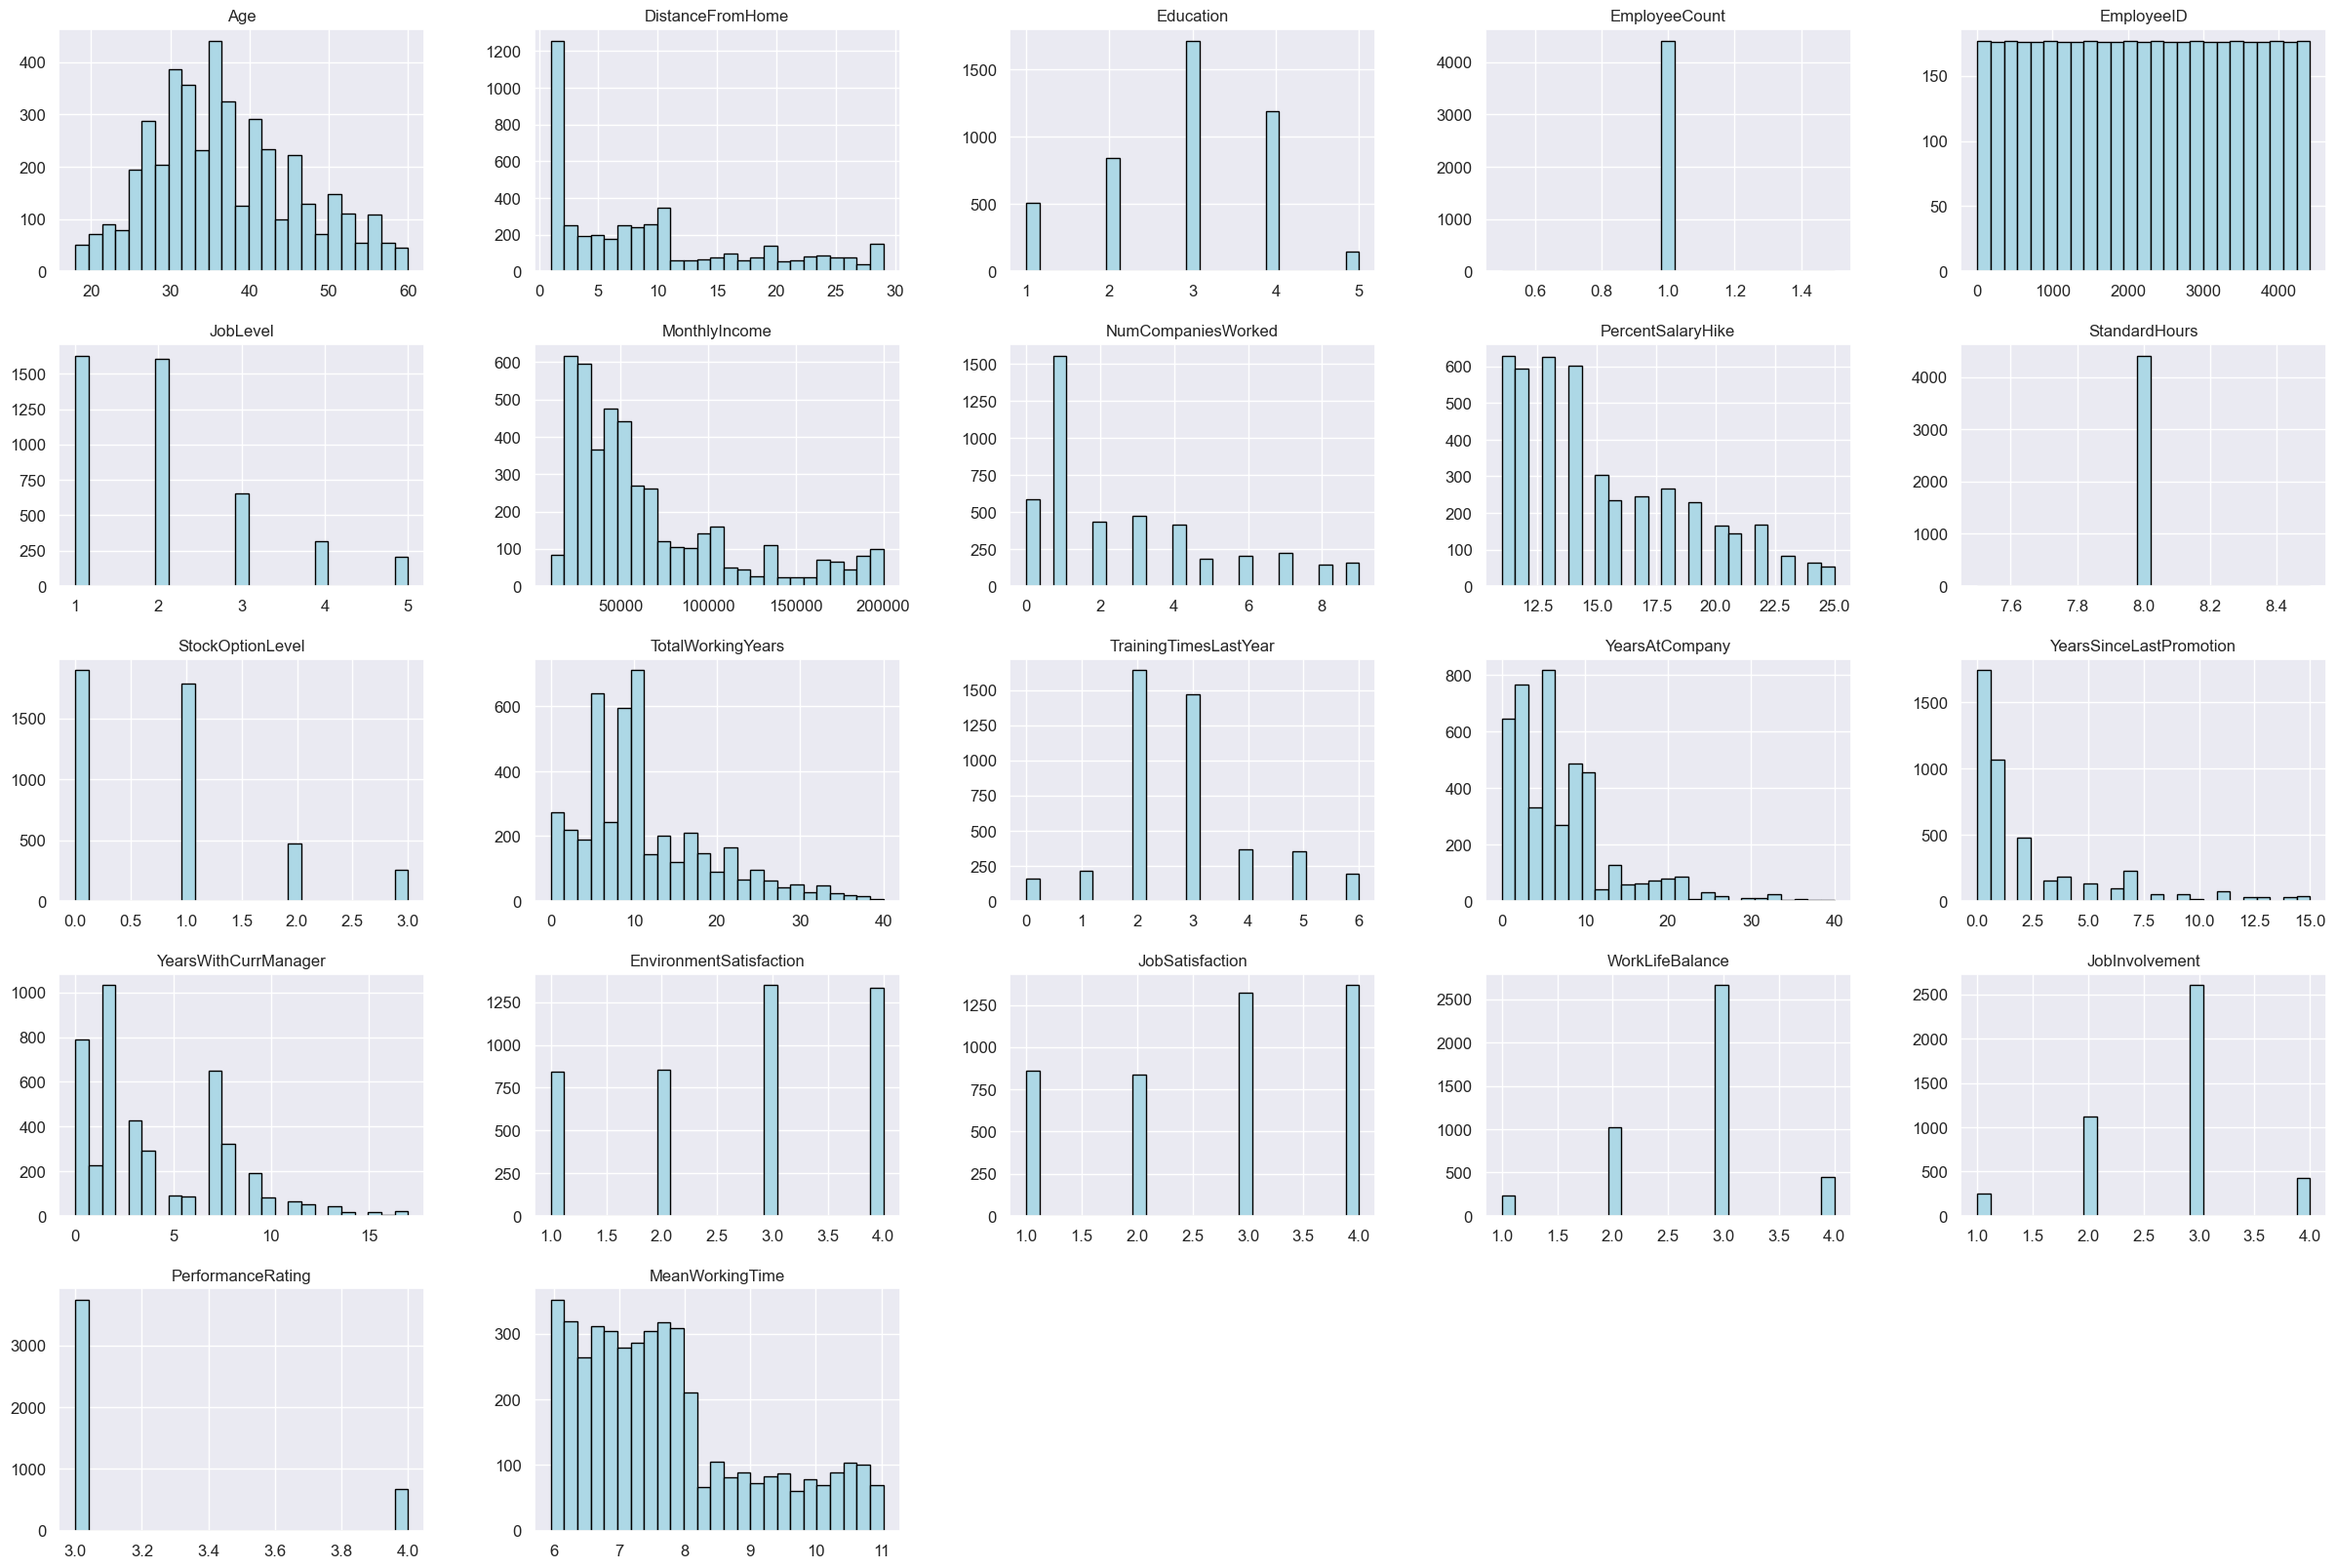

In [613]:
# Diagramme en fonction des différents tableaux 
Merged_data.hist(figsize=(30,20), bins=25, color = "lightblue", column=list(Merged_data.columns), ec="black")

plt.show()

## Pré-traitement des données

Analyse des données

#### Nettoyage des données et préparation des données 

In [614]:
Merged_dataCpy = Merged_data.copy()
merged_cat_quant = Merged_dataCpy[["Attrition", "BusinessTravel", "Department", "EducationField",  "JobRole", "MaritalStatus",
                                   "Gender", "Over18"]]

ordinal_encoder = OrdinalEncoder()
merged_cat_encoded = ordinal_encoder.fit_transform(merged_cat_quant)
merged_cat_encoded = pd.DataFrame(merged_cat_encoded, columns=merged_cat_quant.columns.values)
merged_cat_encoded["EmployeeID"] = merged_cat_encoded.index+1
merged_cat_encoded[:10]

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Gender,Over18,EmployeeID
0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1
1,1.0,1.0,1.0,1.0,6.0,2.0,0.0,0.0,2
2,0.0,1.0,1.0,4.0,7.0,1.0,1.0,0.0,3
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4
4,0.0,2.0,1.0,3.0,7.0,2.0,1.0,0.0,5
5,0.0,2.0,1.0,1.0,5.0,1.0,0.0,0.0,6
6,1.0,2.0,1.0,3.0,7.0,2.0,1.0,0.0,7
7,0.0,2.0,1.0,1.0,7.0,1.0,1.0,0.0,8
8,0.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,9
9,0.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,10


In [615]:
Merged_dataCpy.update(merged_cat_encoded)
convert_dict = {"Attrition": float, "BusinessTravel": float, "Department": float, "EducationField": float, 
                "JobRole": float, "MaritalStatus": float, "Gender": float, "Over18": float}
Merged_dataCpy = Merged_dataCpy.astype(convert_dict)
Merged_dataCpy.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
0,51,0.0,2.0,2.0,6,2,1.0,1,1,0.0,...,6,1,0,0,3.0,4.0,2.0,3,3,7.373651
1,31,1.0,1.0,1.0,10,1,1.0,1,2,0.0,...,3,5,1,4,3.0,2.0,4.0,2,4,7.718969
2,32,0.0,1.0,1.0,17,4,4.0,1,3,1.0,...,2,5,0,3,2.0,2.0,1.0,3,3,7.013240
3,38,0.0,0.0,1.0,2,5,1.0,1,4,1.0,...,5,8,7,5,4.0,4.0,3.0,2,3,7.193678
4,32,0.0,2.0,1.0,10,1,3.0,1,5,1.0,...,2,6,0,4,4.0,1.0,3.0,3,3,8.006175


## KNN

remplir les valeurs manquante

In [616]:
#instanciation et définition du k
knn = Merged_data[['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance']]
#for column in

imputer = KNNImputer(n_neighbors=5,missing_values=np.nan)
imputer.fit_transform(knn)
sample_incomplete_rows = pd.DataFrame(imputer.fit_transform(knn), columns=knn.columns.values)
Merged_dataCpy.update(sample_incomplete_rows)


In [617]:
Merged_dataCpy.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
MeanWorkingTime            0
dtype: int64

In [651]:
Merged_dataCpy.info(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   float64
 2   Department               4410 non-null   float64
 3   EducationField           4410 non-null   float64
 4   EmployeeCount            4410 non-null   int64  
 5   Gender                   4410 non-null   float64
 6   JobRole                  4410 non-null   float64
 7   MaritalStatus            4410 non-null   float64
 8   MonthlyIncome            4410 non-null   int64  
 9   NumCompaniesWorked       4410 non-null   float64
 10  Over18                   4410 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StandardHours            4410 non-null   int64  
 13  TotalWorkingYears        4410 non-null   float64
 14  TrainingTimesLastYear   

Nous allons dans cette partie visualiser les variables qui pourrait nous intéresser.

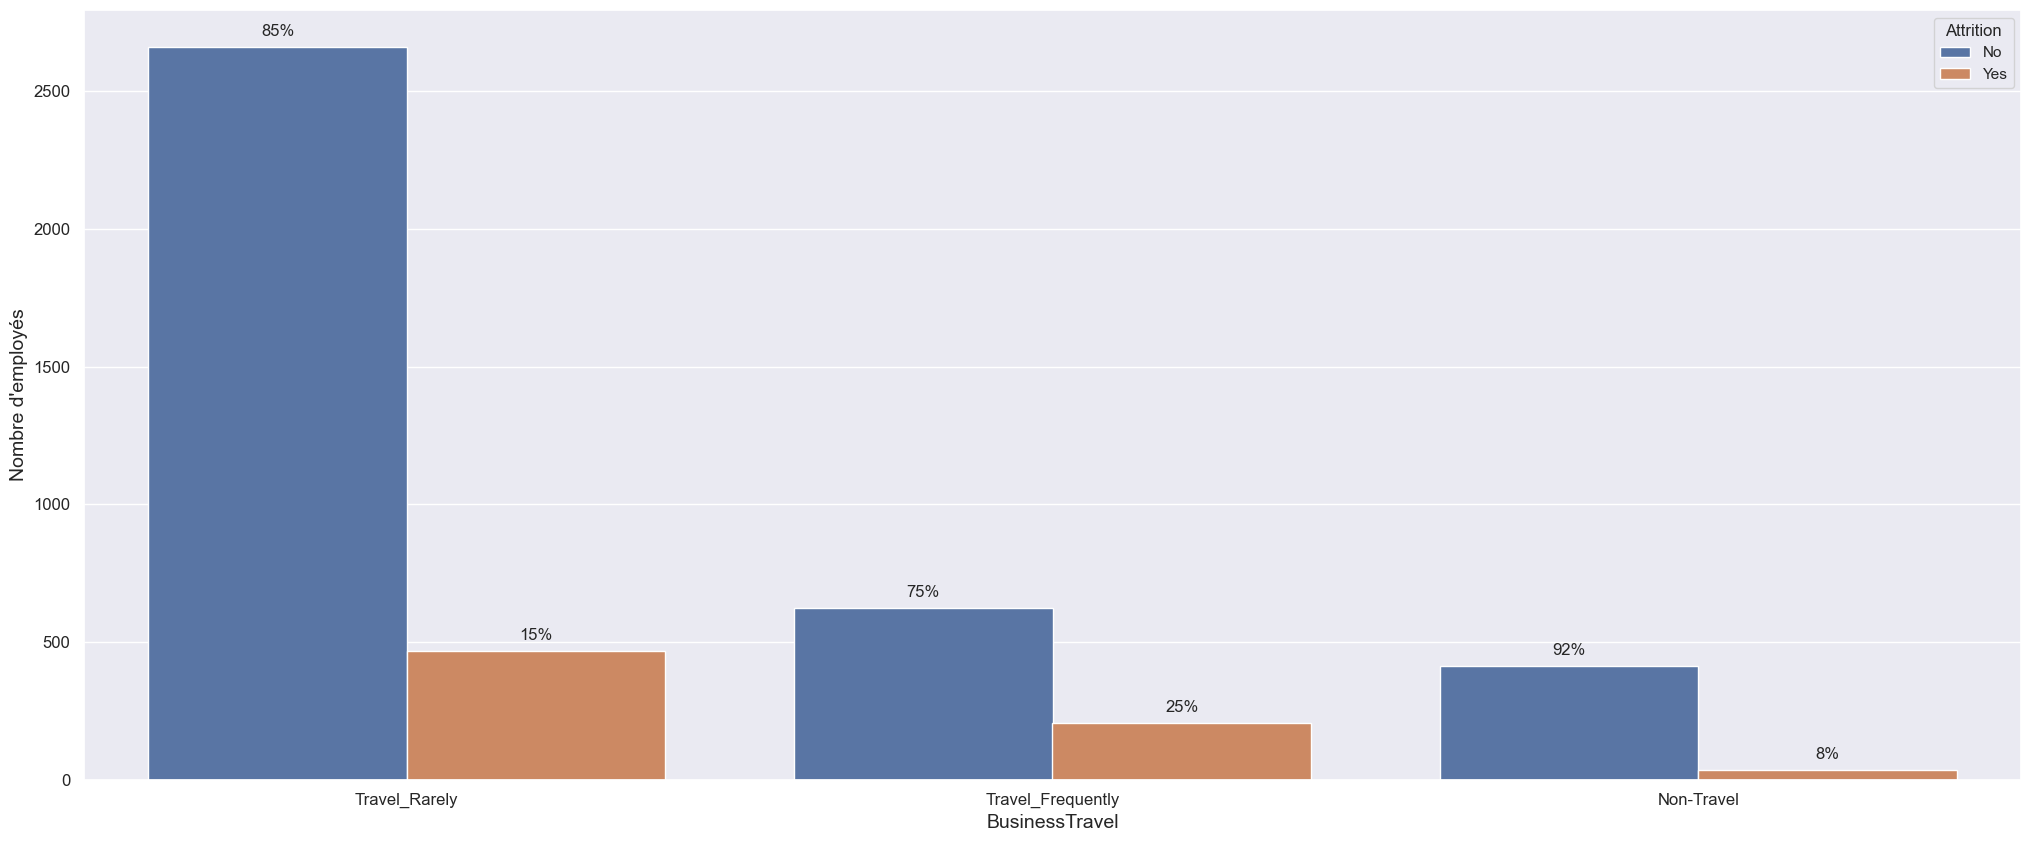

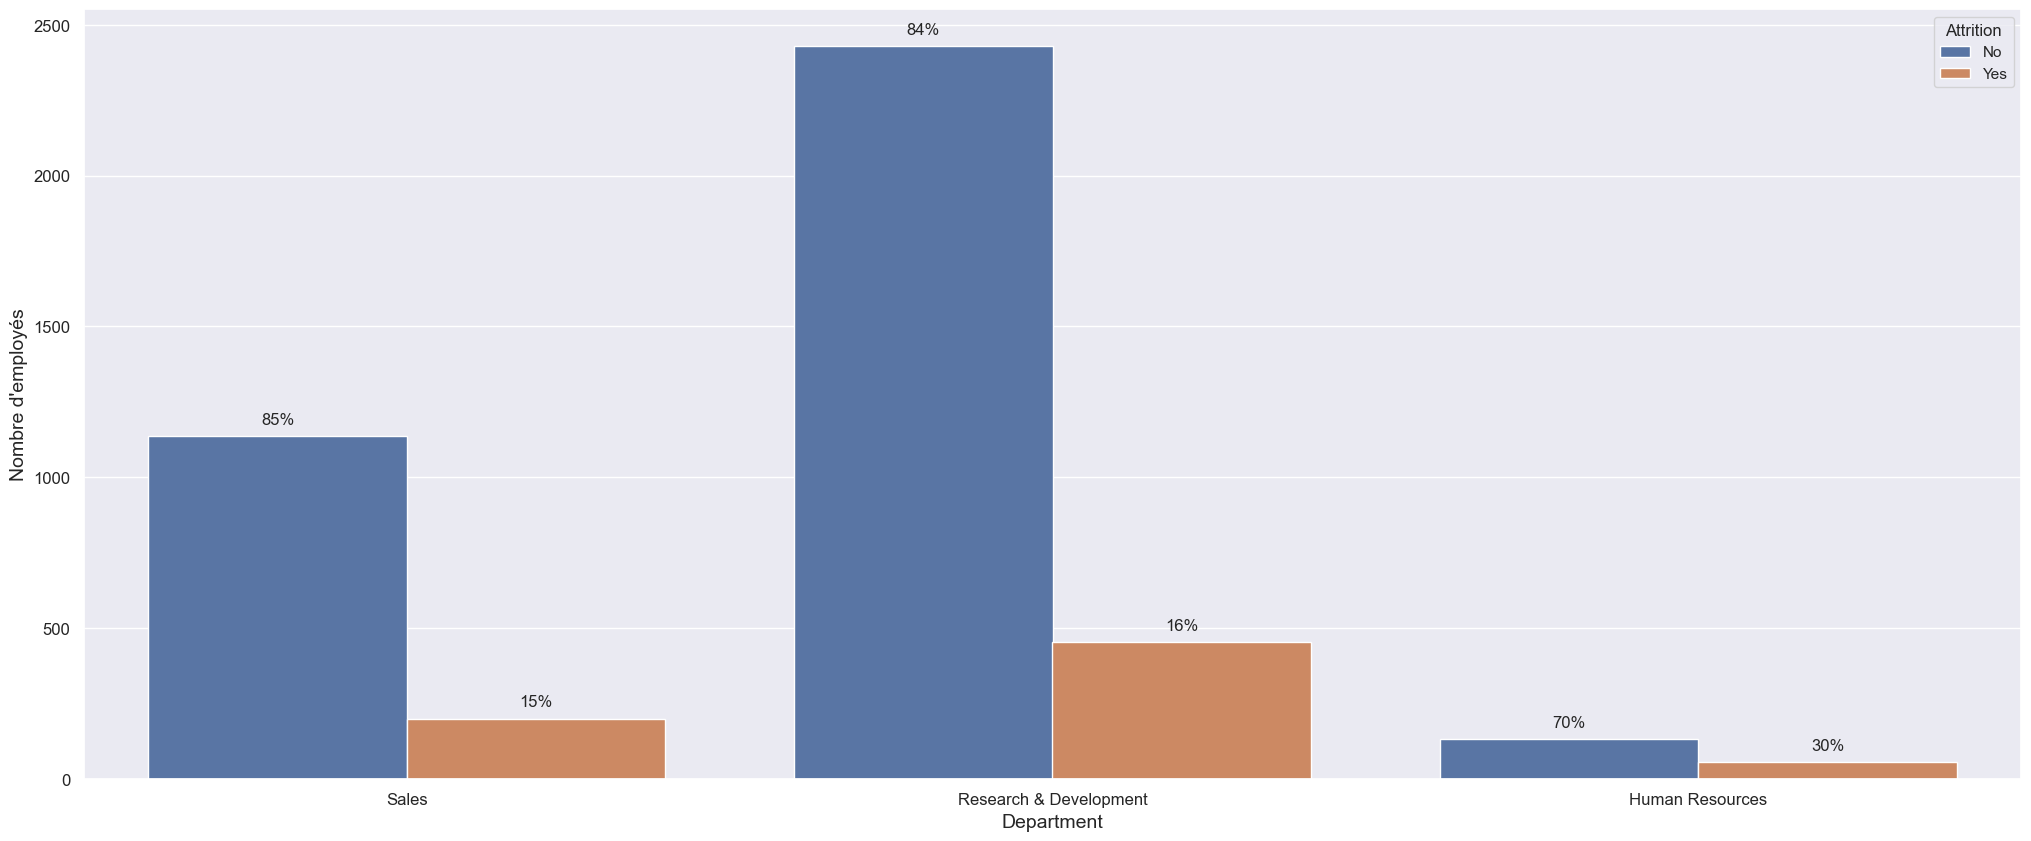

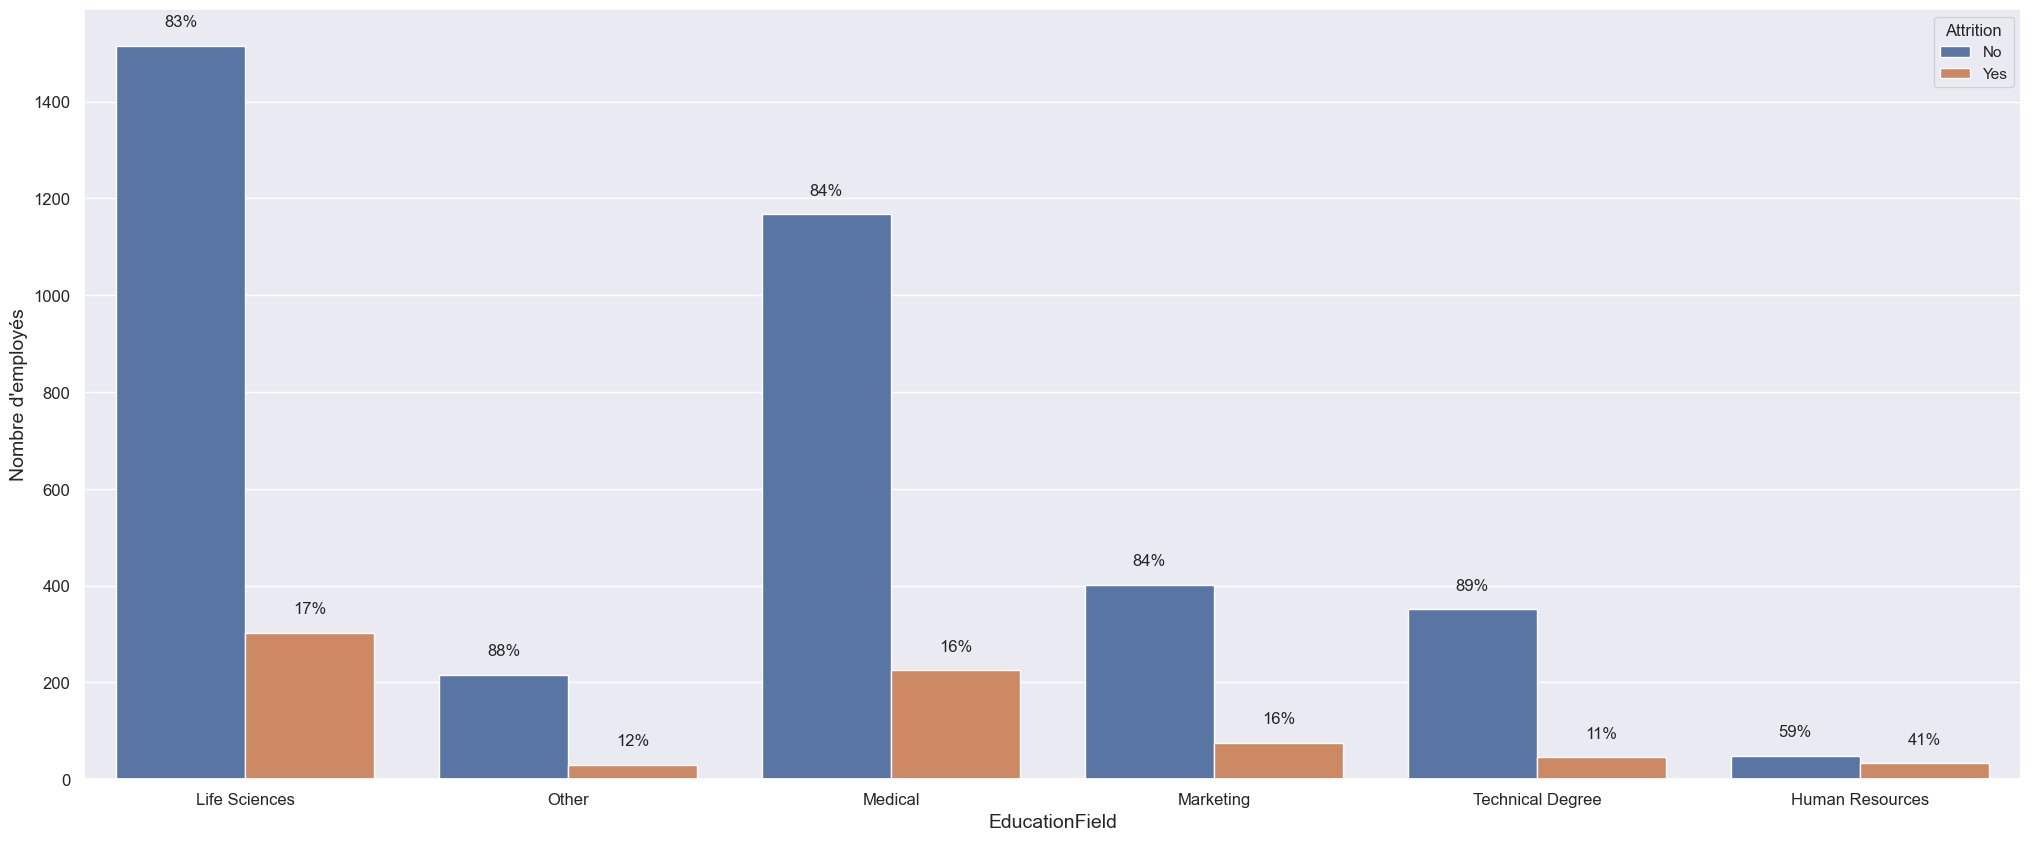

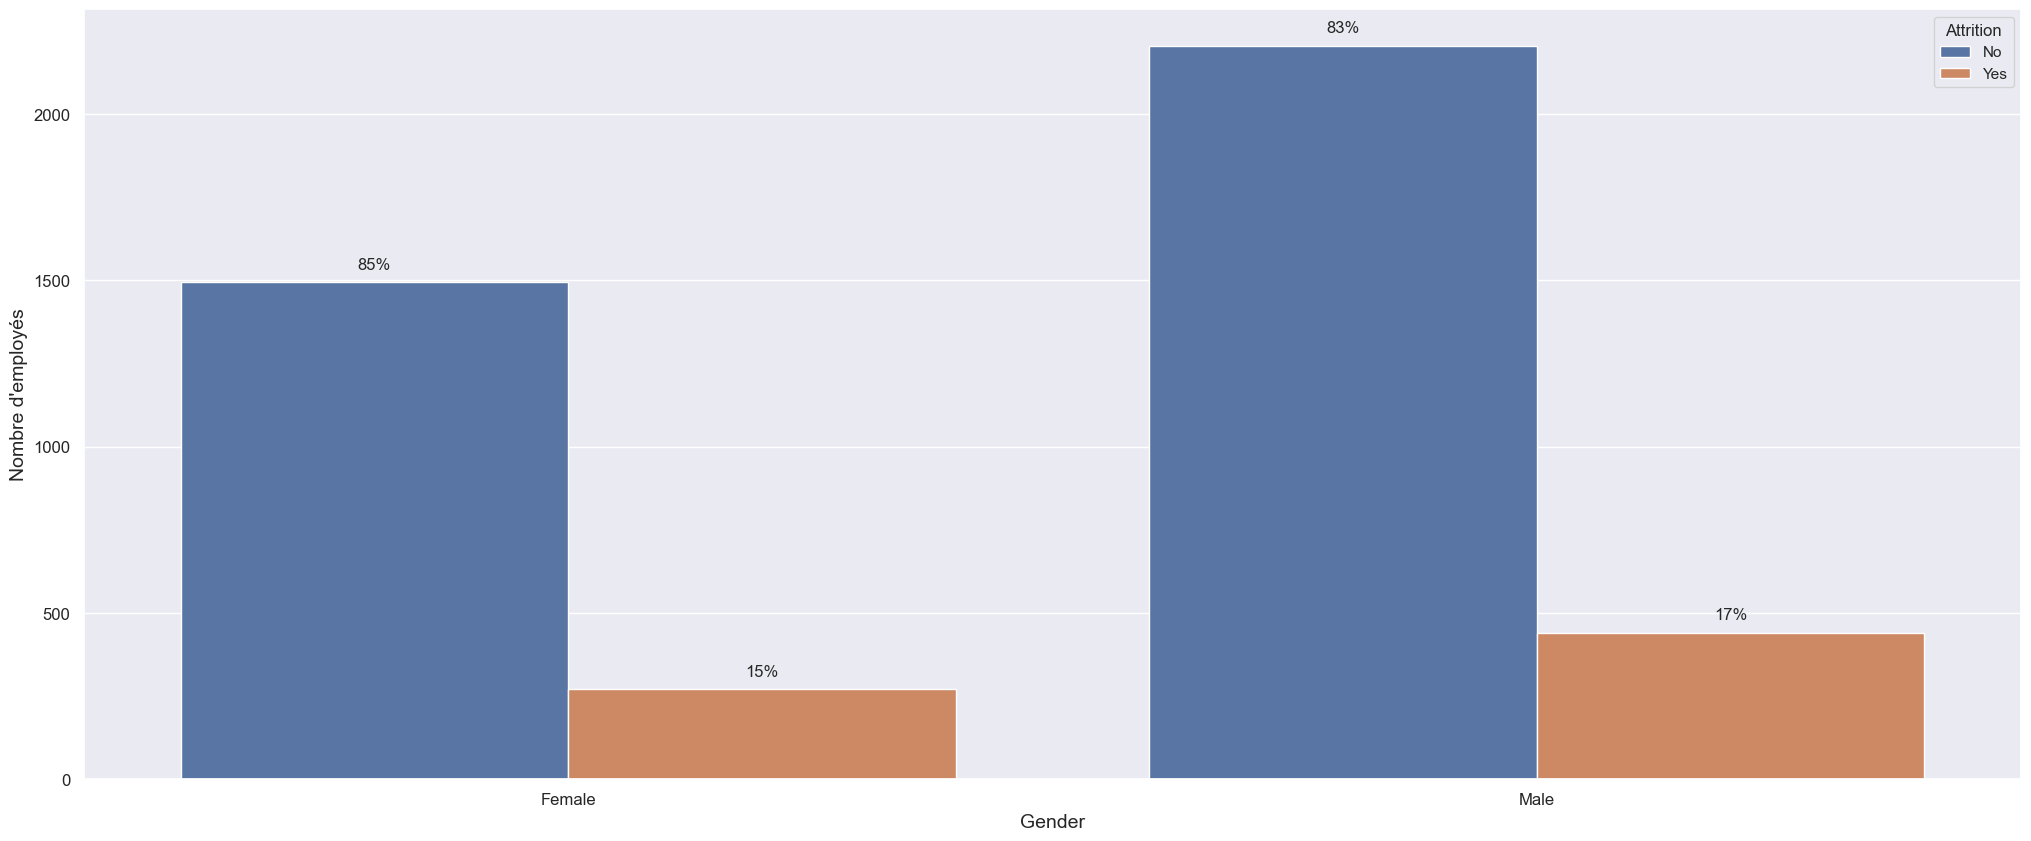

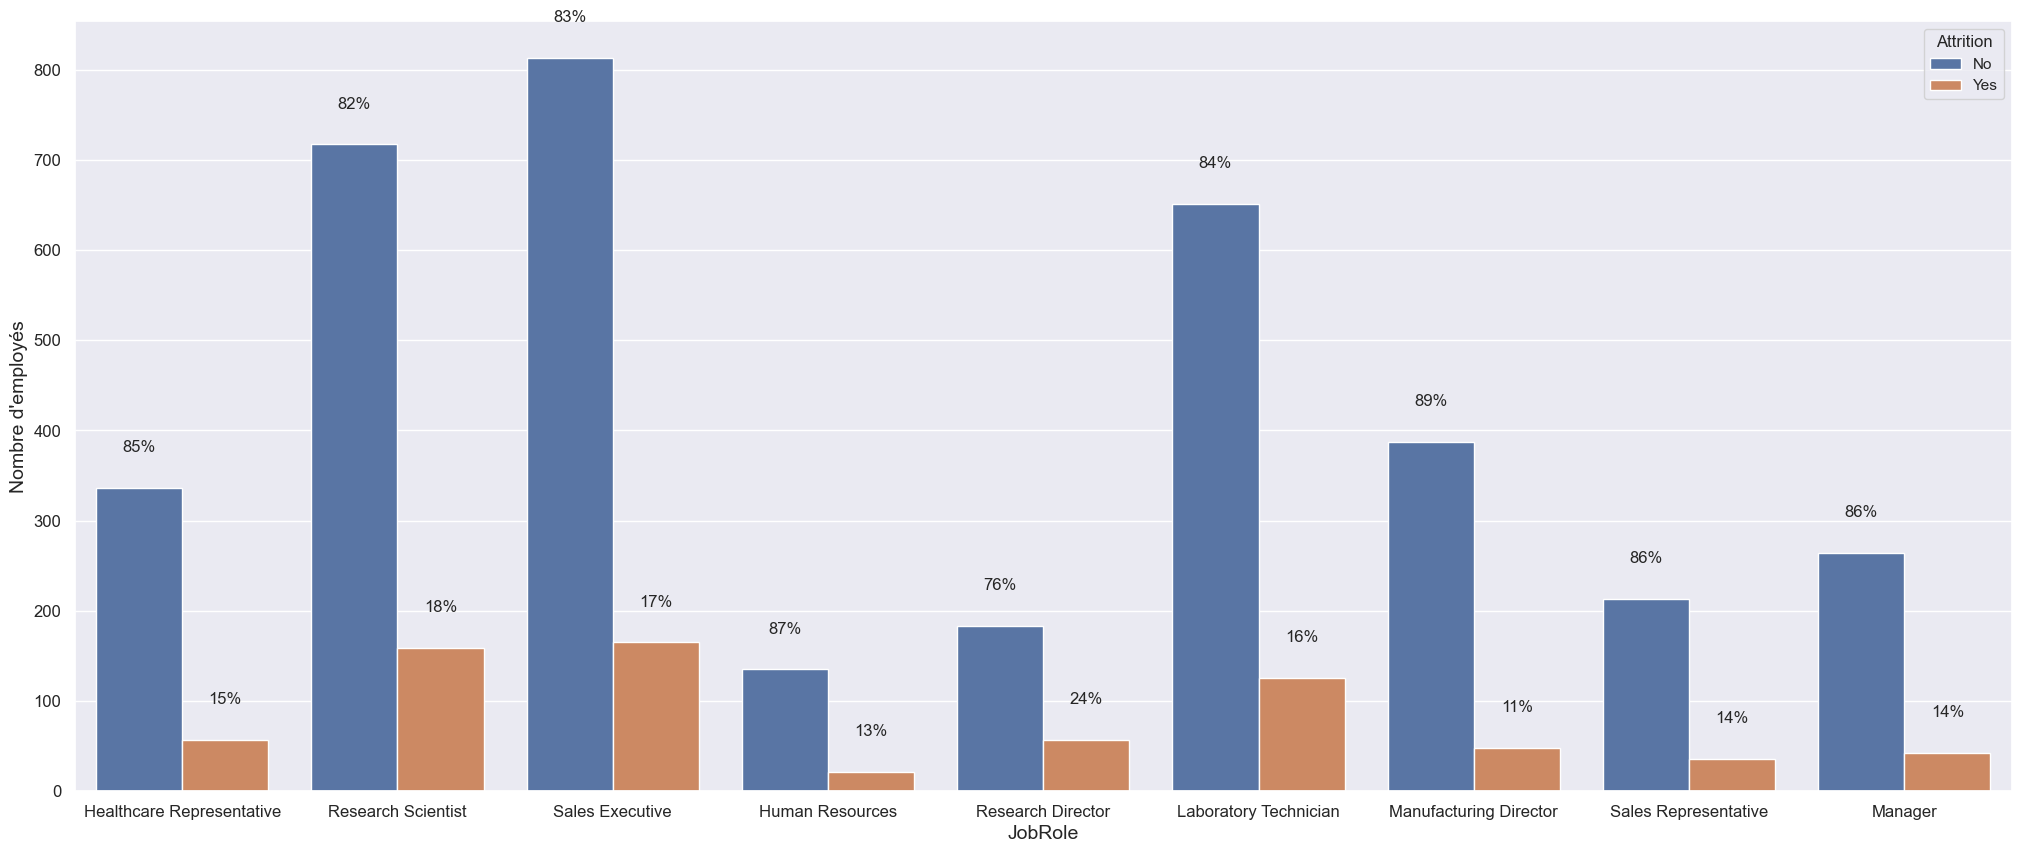

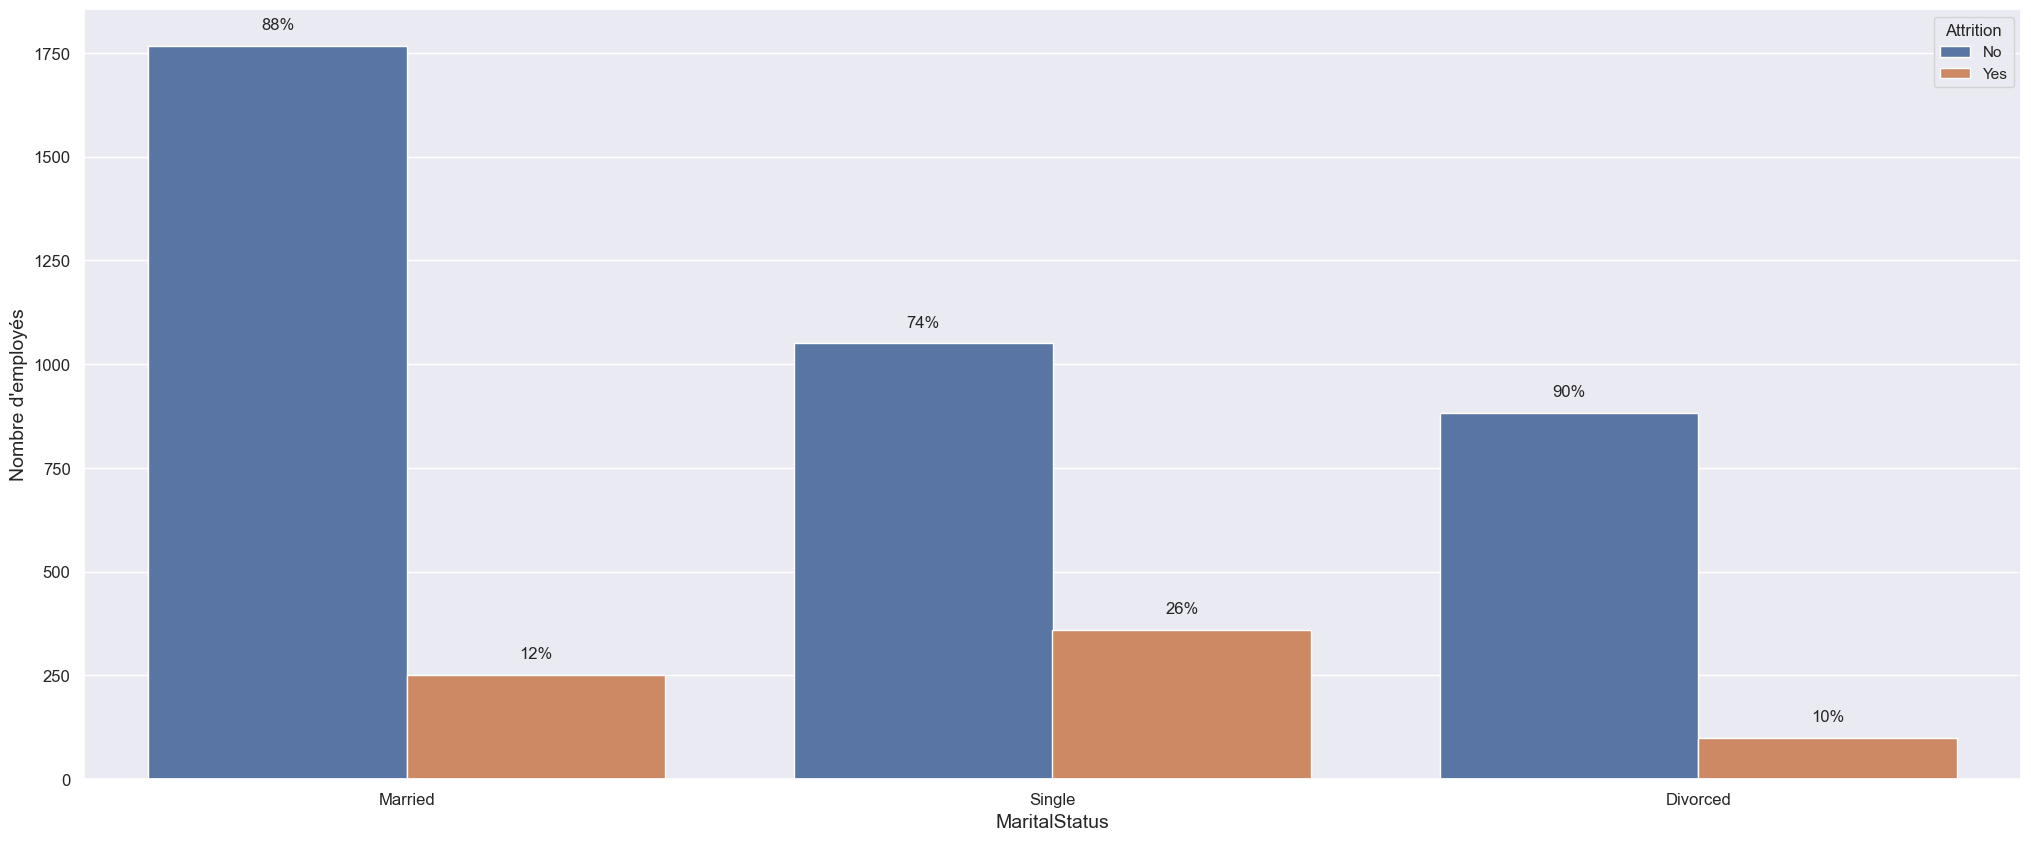

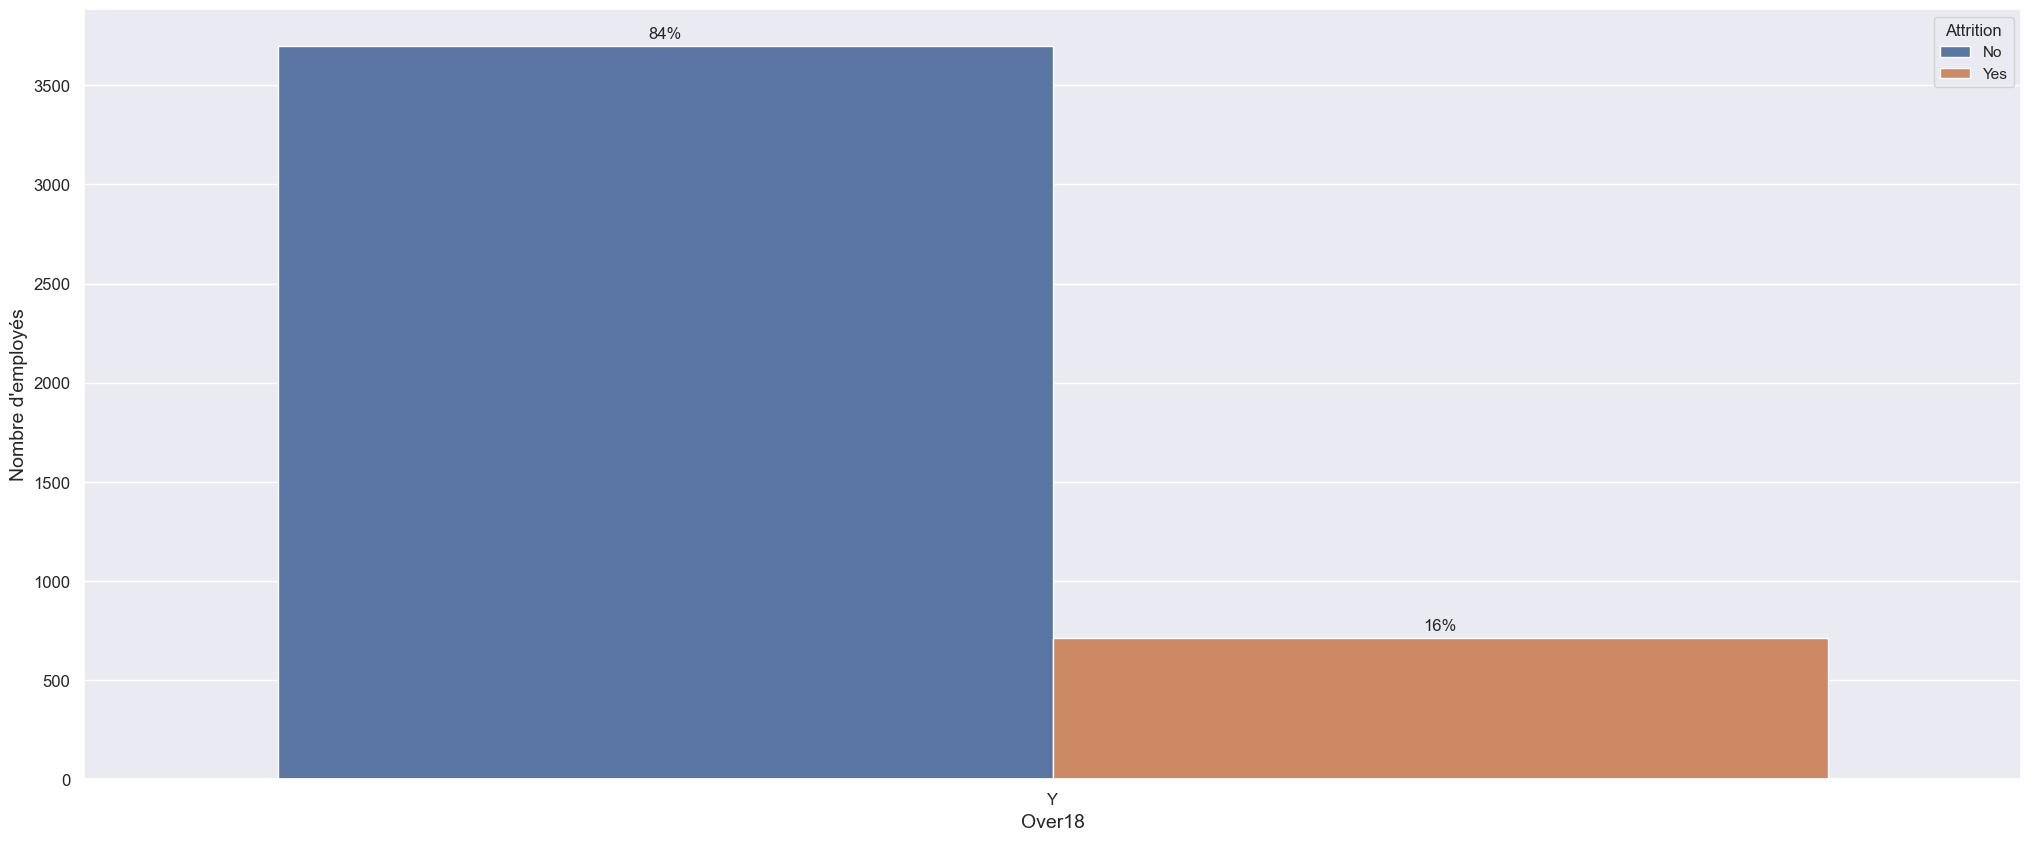

In [618]:
for name_column in Merged_data.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        plt.figure(figsize=(25,10))
        ax = sns.countplot(x=name_column, data=Merged_data, hue="Attrition")

        ax.set_ylabel('Nombre d\'employés')
        bars = ax.patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

Les boîtes à moustaches

*Une boîte à moustaches montre la distribution des données pour une variable continue.*
Elle permet de vérifier la normalité et d'identifier des points qui peuvent être des valeurs aberrantes. 

La ligne centrale est la médiane des données
La moitié des données est supérieure à cette valeur et l'autre moitié est inférieure.
De plus, le bas et le haut de la boîte sont les deux quantiles, appelés quartiles, car chacun coupe un quart des données. 

## Analyse de variance

ANOVA

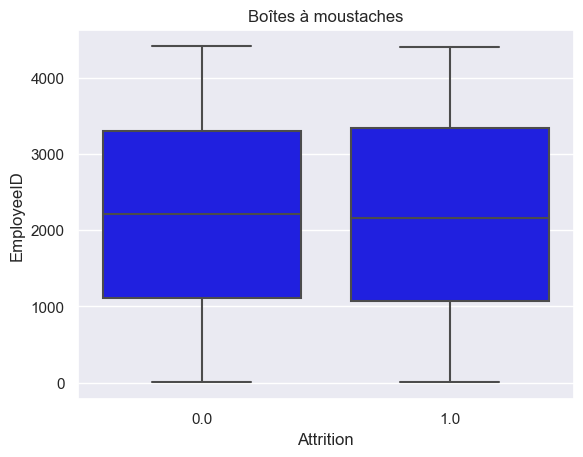

                            OLS Regression Results                            
Dep. Variable:             EmployeeID   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.09859
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.754
Time:                        04:11:49   Log-Likelihood:                -37785.
No. Observations:                4410   AIC:                         7.557e+04
Df Residuals:                    4408   BIC:                         7.559e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2208.1395     20.936    105.470      0.0

,sum_sq,df,F,PR(>F)
Attrition,1.598438e+05,1.0,0.098585,0.753549
Residual,7.147017e+09,4408.0,NaN,NaN


In [619]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set()

ax = sns.boxplot(x="Attrition", y="EmployeeID", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('EmployeeID')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('EmployeeID~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

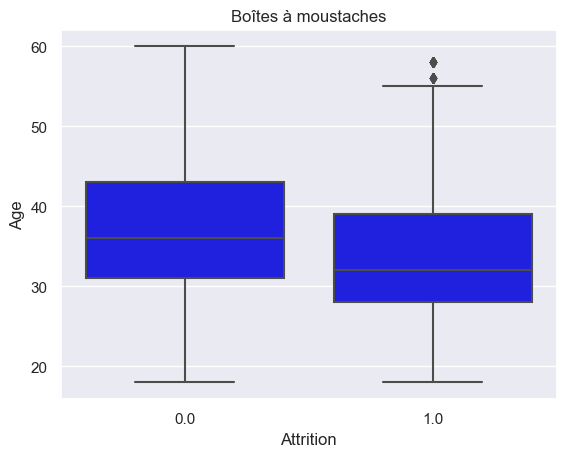

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     114.6
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           2.00e-26
Time:                        04:11:49   Log-Likelihood:                -15955.
No. Observations:                4410   AIC:                         3.191e+04
Df Residuals:                    4408   BIC:                         3.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.5612      0.148    253.326      0.0

,sum_sq,df,F,PR(>F)
Attrition,9322.000234,1.0,114.631682,1.996802e-26
Residual,358464.399766,4408.0,NaN,NaN


In [620]:
ax = sns.boxplot(x="Attrition", y="Age", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('Age~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

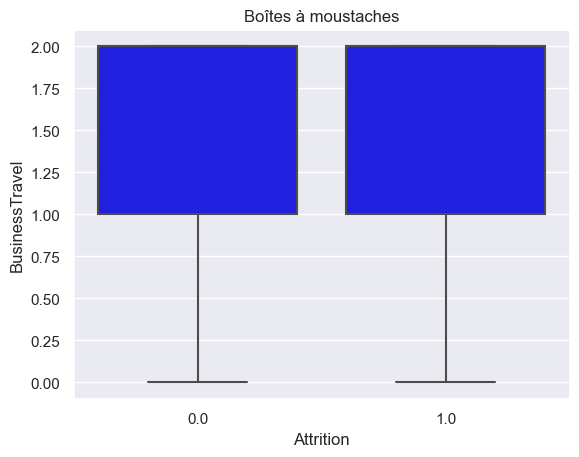

                            OLS Regression Results                            
Dep. Variable:         BusinessTravel   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 2.399e-05
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.996
Time:                        04:11:50   Log-Likelihood:                -4459.9
No. Observations:                4410   AIC:                             8924.
Df Residuals:                    4408   BIC:                             8937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6075      0.011    146.931      0.0

,sum_sq,df,F,PR(>F)
Attrition,0.000011,1.0,0.000024,0.996092
Residual,1951.553051,4408.0,NaN,NaN


In [621]:
ax = sns.boxplot(x="Attrition", y="BusinessTravel", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('BusinessTravel')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('BusinessTravel~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

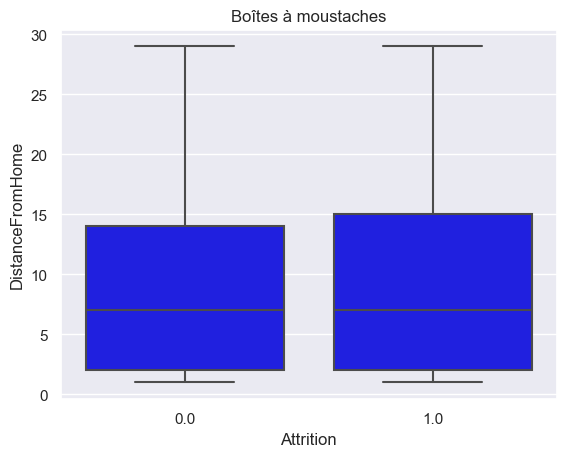

                            OLS Regression Results                            
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4174
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.518
Time:                        04:11:51   Log-Likelihood:                -15485.
No. Observations:                4410   AIC:                         3.097e+04
Df Residuals:                    4408   BIC:                         3.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2271      0.133     69.235      0.0

,sum_sq,df,F,PR(>F)
Attrition,27.421243,1.0,0.41737,0.518286
Residual,289606.131818,4408.0,NaN,NaN


In [622]:
ax = sns.boxplot(x="Attrition", y="DistanceFromHome", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('DistanceFromHome~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

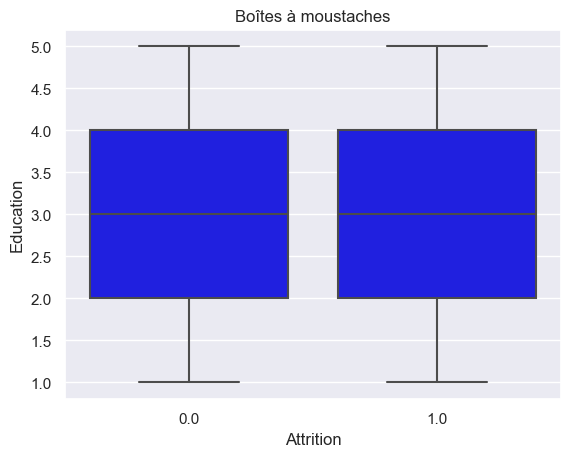

                            OLS Regression Results                            
Dep. Variable:              Education   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.007
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.316
Time:                        04:11:52   Log-Likelihood:                -6360.8
No. Observations:                4410   AIC:                         1.273e+04
Df Residuals:                    4408   BIC:                         1.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9197      0.017    173.425      0.0

,sum_sq,df,F,PR(>F)
Attrition,1.055550,1.0,1.006785,0.315729
Residual,4621.507715,4408.0,NaN,NaN


In [623]:
ax = sns.boxplot(x="Attrition", y="Education", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('Education~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

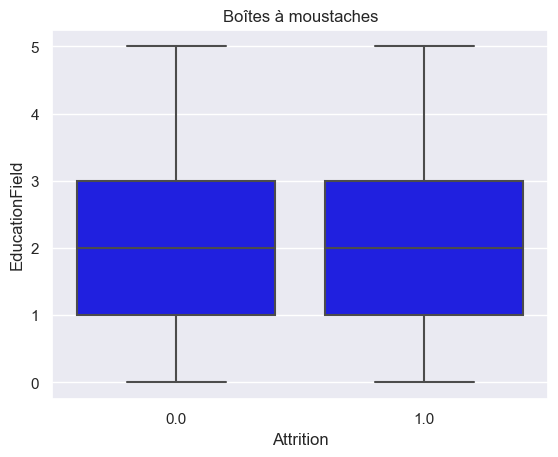

                            OLS Regression Results                            
Dep. Variable:         EducationField   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.85
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           0.000118
Time:                        04:11:52   Log-Likelihood:                -7510.8
No. Observations:                4410   AIC:                         1.503e+04
Df Residuals:                    4408   BIC:                         1.504e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2814      0.022    104.407      0.0

,sum_sq,df,F,PR(>F)
Attrition,26.224165,1.0,14.847853,0.000118
Residual,7785.375835,4408.0,NaN,NaN


In [624]:
ax = sns.boxplot(x="Attrition", y="EducationField", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('EducationField')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('EducationField~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

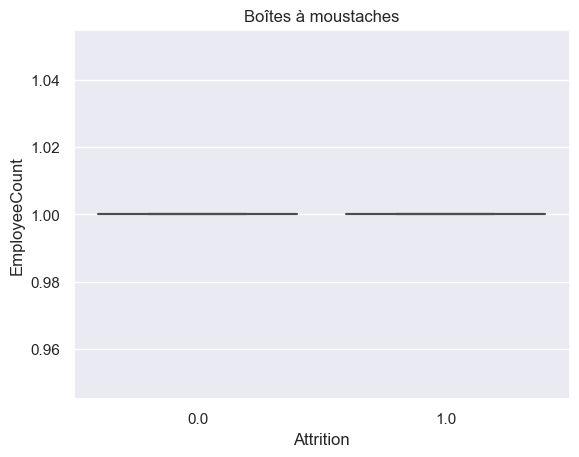

                            OLS Regression Results                            
Dep. Variable:          EmployeeCount   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -4408.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               1.00
Time:                        04:11:53   Log-Likelihood:             1.3494e+05
No. Observations:                4410   AIC:                        -2.699e+05
Df Residuals:                    4408   BIC:                        -2.699e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   2.04e-16   4.89e+15      0.0

c:\Users\hadri\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,sum_sq,df,F,PR(>F)
Attrition,2.404020e-28,1.0,1.554423,0.21255
Residual,6.817269e-25,4408.0,NaN,NaN


In [625]:
ax = sns.boxplot(x="Attrition", y="EmployeeCount", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('EmployeeCount')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('EmployeeCount~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

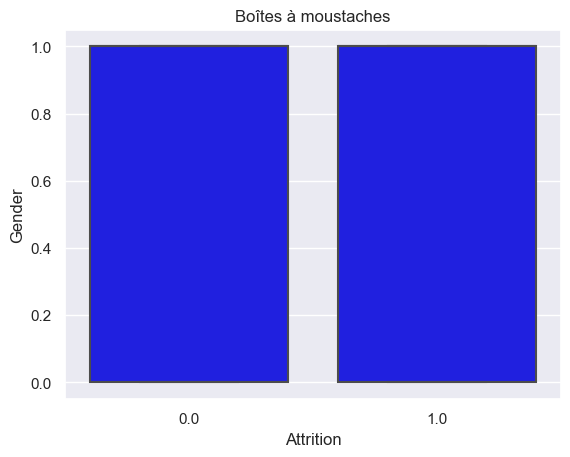

                            OLS Regression Results                            
Dep. Variable:                 Gender   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.449
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.229
Time:                        04:11:54   Log-Likelihood:                -3110.0
No. Observations:                4410   AIC:                             6224.
Df Residuals:                    4408   BIC:                             6237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5961      0.008     74.000      0.0

,sum_sq,df,F,PR(>F)
Attrition,0.347704,1.0,1.448585,0.22882
Residual,1058.052296,4408.0,NaN,NaN


In [626]:
ax = sns.boxplot(x="Attrition", y="Gender", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('Gender')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('Gender~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

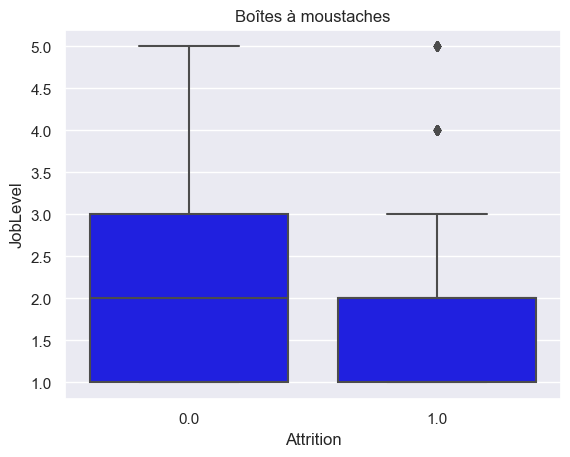

                            OLS Regression Results                            
Dep. Variable:               JobLevel   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4668
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.495
Time:                        04:11:55   Log-Likelihood:                -6703.8
No. Observations:                4410   AIC:                         1.341e+04
Df Residuals:                    4408   BIC:                         1.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0689      0.018    113.694      0.0

,sum_sq,df,F,PR(>F)
Attrition,0.571739,1.0,0.466761,0.494517
Residual,5399.395608,4408.0,NaN,NaN


In [627]:
ax = sns.boxplot(x="Attrition", y="JobLevel", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('JobLevel')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('JobLevel~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

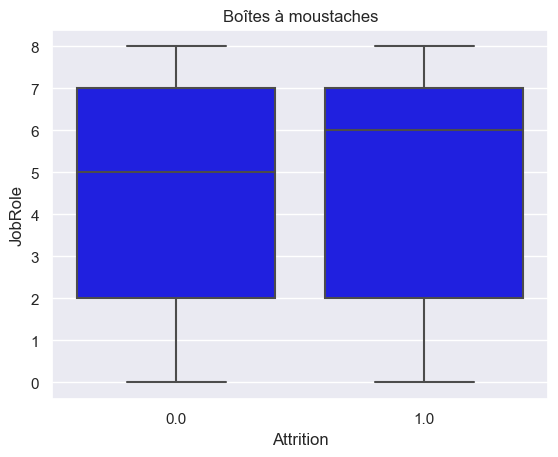

                            OLS Regression Results                            
Dep. Variable:                JobRole   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.938
Date:                Fri, 17 Mar 2023   Prob (F-statistic):             0.0866
Time:                        04:11:56   Log-Likelihood:                -10228.
No. Observations:                4410   AIC:                         2.046e+04
Df Residuals:                    4408   BIC:                         2.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4307      0.040    109.508      0.0

,sum_sq,df,F,PR(>F)
Attrition,17.790720,1.0,2.938112,0.086582
Residual,26691.115402,4408.0,NaN,NaN


In [628]:
ax = sns.boxplot(x="Attrition", y="JobRole", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('JobRole')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('JobRole~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

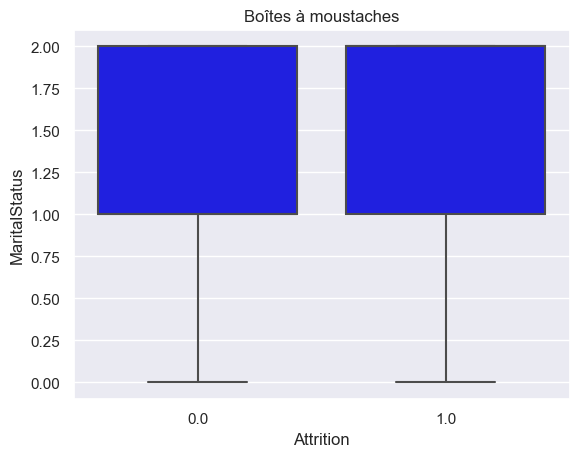

                            OLS Regression Results                            
Dep. Variable:          MaritalStatus   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     118.9
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           2.44e-27
Time:                        04:11:57   Log-Likelihood:                -4810.2
No. Observations:                4410   AIC:                             9624.
Df Residuals:                    4408   BIC:                             9637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0454      0.012     88.261      0.0

,sum_sq,df,F,PR(>F)
Attrition,61.707644,1.0,118.907189,2.444915e-27
Residual,2287.559703,4408.0,NaN,NaN


In [629]:
ax = sns.boxplot(x="Attrition", y="MaritalStatus", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('MaritalStatus')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('MaritalStatus~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

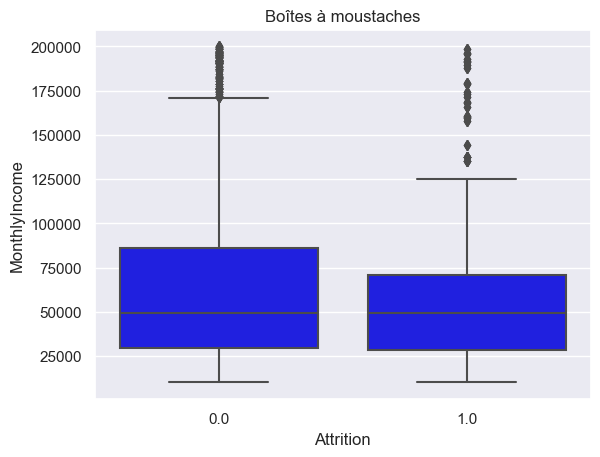

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.289
Date:                Fri, 17 Mar 2023   Prob (F-statistic):             0.0384
Time:                        04:11:57   Log-Likelihood:                -53704.
No. Observations:                4410   AIC:                         1.074e+05
Df Residuals:                    4408   BIC:                         1.074e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.567e+04    773.624     84.890      0.0

,sum_sq,df,F,PR(>F)
Attrition,9.494162e+09,1.0,4.28857,0.038427
Residual,9.758558e+12,4408.0,NaN,NaN


In [630]:
ax = sns.boxplot(x="Attrition", y="MonthlyIncome", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('MonthlyIncome~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

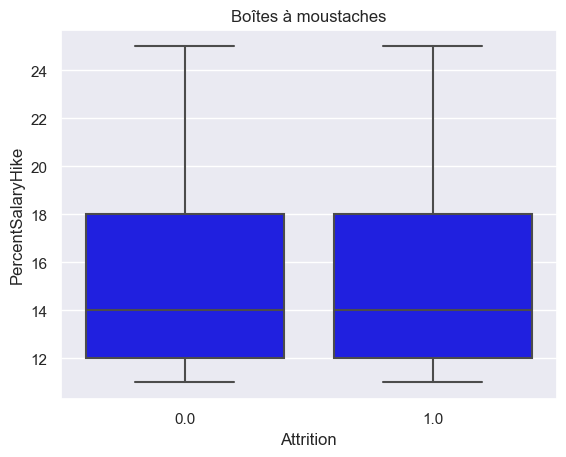

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.670
Date:                Fri, 17 Mar 2023   Prob (F-statistic):             0.0307
Time:                        04:11:58   Log-Likelihood:                -11975.
No. Observations:                4410   AIC:                         2.395e+04
Df Residuals:                    4408   BIC:                         2.397e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1573      0.060    252.041      0.0

,sum_sq,df,F,PR(>F)
Attrition,62.478105,1.0,4.670237,0.030743
Residual,58969.921895,4408.0,NaN,NaN


In [631]:
ax = sns.boxplot(x="Attrition", y="PercentSalaryHike", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('PercentSalaryHike')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('PercentSalaryHike~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

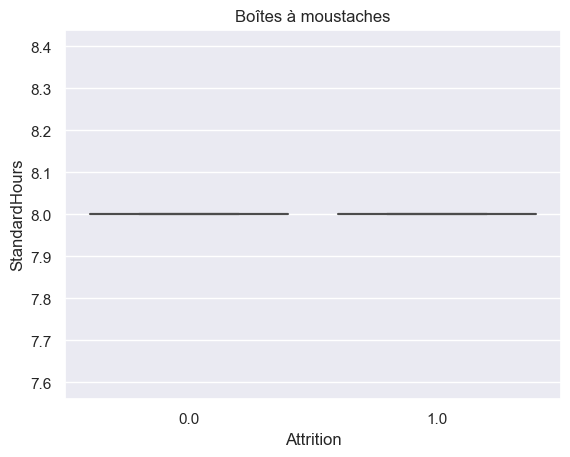

                            OLS Regression Results                            
Dep. Variable:          StandardHours   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -4408.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               1.00
Time:                        04:11:59   Log-Likelihood:             1.2577e+05
No. Observations:                4410   AIC:                        -2.515e+05
Df Residuals:                    4408   BIC:                        -2.515e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0000   1.64e-15   4.89e+15      0.0

c:\Users\hadri\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,sum_sq,df,F,PR(>F)
Attrition,1.538573e-26,1.0,1.554423,0.21255
Residual,4.363052e-23,4408.0,NaN,NaN


In [632]:
ax = sns.boxplot(x="Attrition", y="StandardHours", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('StandardHours')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('StandardHours~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

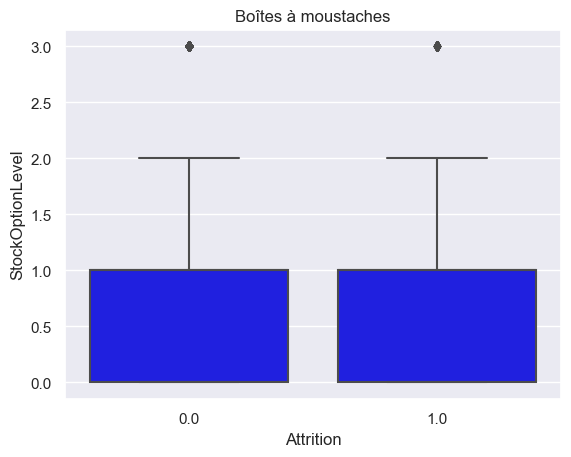

                            OLS Regression Results                            
Dep. Variable:       StockOptionLevel   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2062
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.650
Time:                        04:11:59   Log-Likelihood:                -5550.0
No. Observations:                4410   AIC:                         1.110e+04
Df Residuals:                    4408   BIC:                         1.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7964      0.014     56.855      0.0

,sum_sq,df,F,PR(>F)
Attrition,0.149647,1.0,0.206171,0.649807
Residual,3199.485047,4408.0,NaN,NaN


In [633]:
ax = sns.boxplot(x="Attrition", y="StockOptionLevel", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('StockOptionLevel')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('StockOptionLevel~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

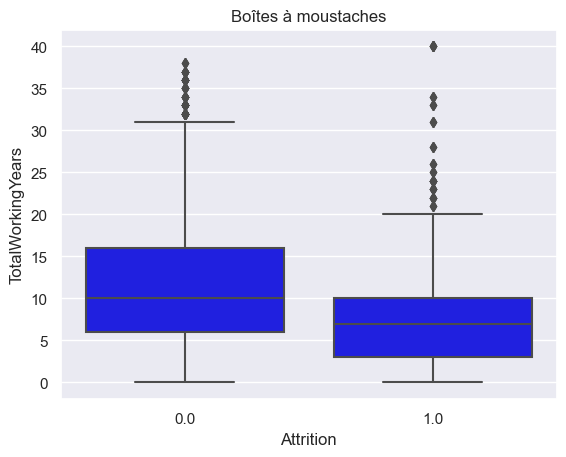

                            OLS Regression Results                            
Dep. Variable:      TotalWorkingYears   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     131.0
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           6.49e-30
Time:                        04:12:00   Log-Likelihood:                -15238.
No. Observations:                4410   AIC:                         3.048e+04
Df Residuals:                    4408   BIC:                         3.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8617      0.126     94.121      0.0

,sum_sq,df,F,PR(>F)
Attrition,7696.982994,1.0,131.011175,6.489697e-30
Residual,258972.572561,4408.0,NaN,NaN


In [634]:
ax = sns.boxplot(x="Attrition", y="TotalWorkingYears", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('TotalWorkingYears~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

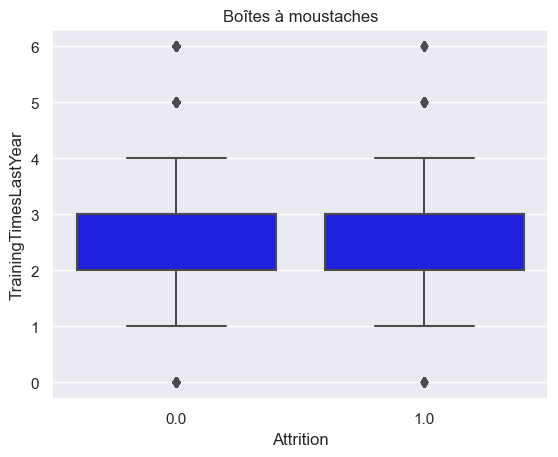

                              OLS Regression Results                             
Dep. Variable:     TrainingTimesLastYear   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     10.80
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):            0.00102
Time:                           04:12:01   Log-Likelihood:                -7371.1
No. Observations:                   4410   AIC:                         1.475e+04
Df Residuals:                       4408   BIC:                         1.476e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8273 

,sum_sq,df,F,PR(>F)
Attrition,17.898745,1.0,10.796808,0.001025
Residual,7307.499215,4408.0,NaN,NaN


In [635]:
ax = sns.boxplot(x="Attrition", y="TrainingTimesLastYear", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('TrainingTimesLastYear')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('TrainingTimesLastYear~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

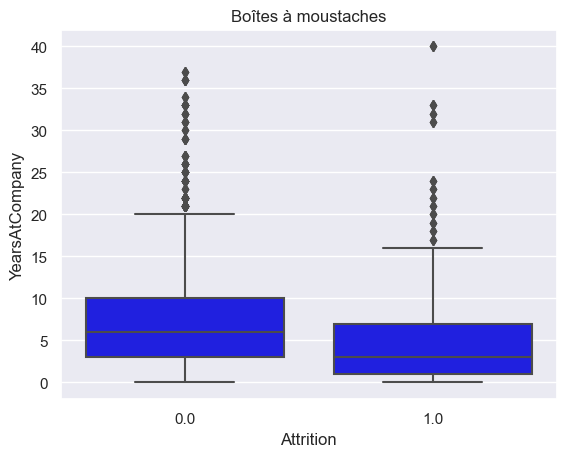

                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     81.08
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           3.16e-19
Time:                        04:12:02   Log-Likelihood:                -14210.
No. Observations:                4410   AIC:                         2.842e+04
Df Residuals:                    4408   BIC:                         2.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3690      0.100     73.832      0.0

,sum_sq,df,F,PR(>F)
Attrition,2987.581142,1.0,81.078445,3.163883e-19
Residual,162426.124981,4408.0,NaN,NaN


In [636]:
ax = sns.boxplot(x="Attrition", y="YearsAtCompany", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('YearsAtCompany')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('YearsAtCompany~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)


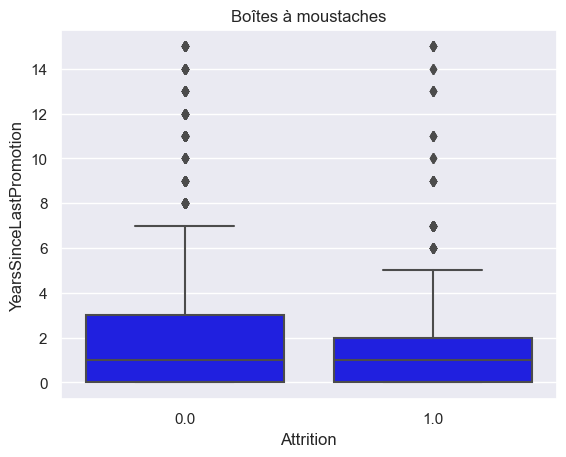

                               OLS Regression Results                              
Dep. Variable:     YearsSinceLastPromotion   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     4.811
Date:                     Fri, 17 Mar 2023   Prob (F-statistic):             0.0283
Time:                             04:12:03   Log-Likelihood:                -11414.
No. Observations:                     4410   AIC:                         2.283e+04
Df Residuals:                         4408   BIC:                         2.284e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

,sum_sq,df,F,PR(>F)
Attrition,49.892128,1.0,4.811021,0.02833
Residual,45712.646648,4408.0,NaN,NaN


In [637]:
ax = sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('YearsSinceLastPromotion')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('YearsSinceLastPromotion~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

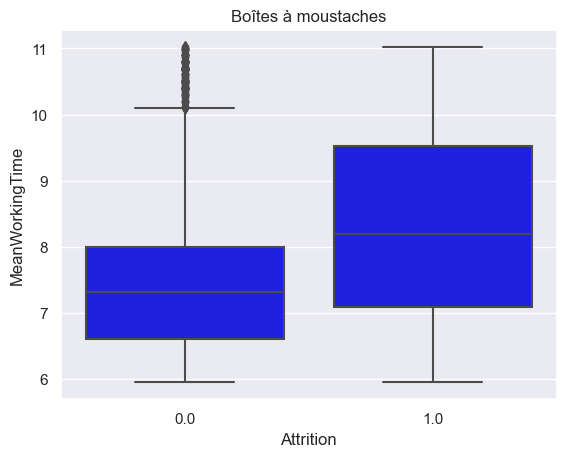

                            OLS Regression Results                            
Dep. Variable:        MeanWorkingTime   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     186.9
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.05e-41
Time:                        04:12:04   Log-Likelihood:                -7456.8
No. Observations:                4410   AIC:                         1.492e+04
Df Residuals:                    4408   BIC:                         1.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5823      0.022    351.266      0.0

,sum_sq,df,F,PR(>F)
Attrition,322.144662,1.0,186.912001,1.052767e-41
Residual,7597.231126,4408.0,NaN,NaN


In [638]:
ax = sns.boxplot(x="Attrition", y="MeanWorkingTime", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('MeanWorkingTime')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('MeanWorkingTime~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

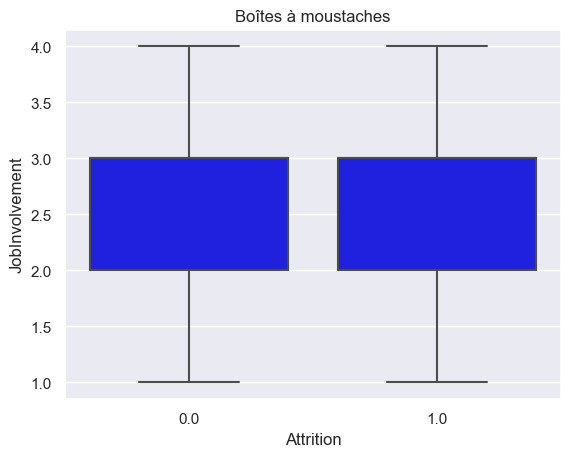

                            OLS Regression Results                            
Dep. Variable:         JobInvolvement   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.071
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.301
Time:                        04:12:04   Log-Likelihood:                -4754.8
No. Observations:                4410   AIC:                             9514.
Df Residuals:                    4408   BIC:                             9526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7348      0.012    233.806      0.0

,sum_sq,df,F,PR(>F)
Attrition,0.542179,1.0,1.071328,0.300702
Residual,2230.806800,4408.0,NaN,NaN


In [639]:
ax = sns.boxplot(x="Attrition", y="JobInvolvement", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('JobInvolvement')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('JobInvolvement~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

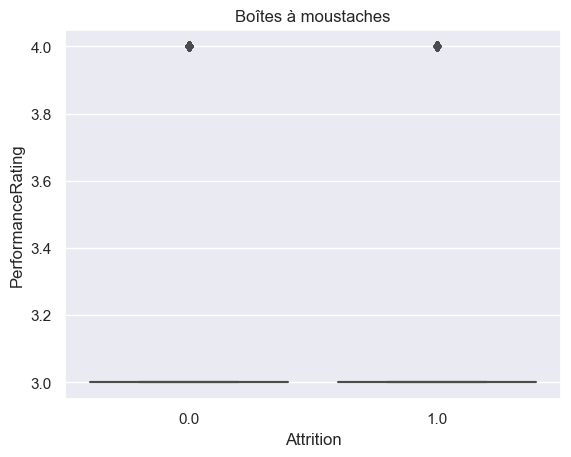

                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.416
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.120
Time:                        04:12:05   Log-Likelihood:                -1759.4
No. Observations:                4410   AIC:                             3523.
Df Residuals:                    4408   BIC:                             3536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1500      0.006    531.168      0.0

,sum_sq,df,F,PR(>F)
Attrition,0.314252,1.0,2.415602,0.120204
Residual,573.449013,4408.0,NaN,NaN


In [640]:
ax = sns.boxplot(x="Attrition", y="PerformanceRating", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('PerformanceRating')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('PerformanceRating~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

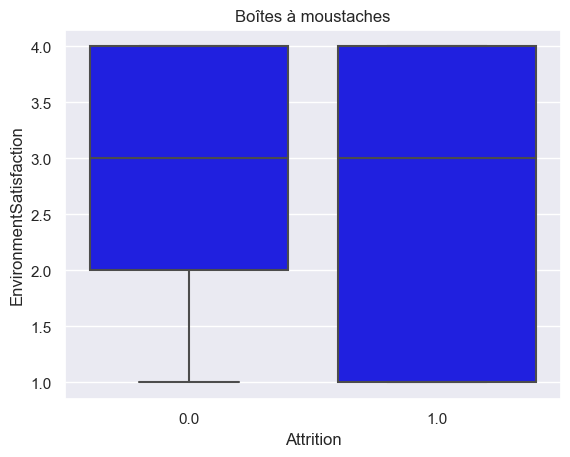

                               OLS Regression Results                              
Dep. Variable:     EnvironmentSatisfaction   R-squared:                       0.010
Model:                                 OLS   Adj. R-squared:                  0.010
Method:                      Least Squares   F-statistic:                     46.00
Date:                     Fri, 17 Mar 2023   Prob (F-statistic):           1.34e-11
Time:                             04:12:06   Log-Likelihood:                -6616.7
No. Observations:                     4410   AIC:                         1.324e+04
Df Residuals:                         4408   BIC:                         1.325e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

,sum_sq,df,F,PR(>F)
Attrition,54.163297,1.0,46.000714,1.338592e-11
Residual,5190.176258,4408.0,NaN,NaN


In [641]:
ax = sns.boxplot(x="Attrition", y="EnvironmentSatisfaction", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('EnvironmentSatisfaction')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('EnvironmentSatisfaction~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

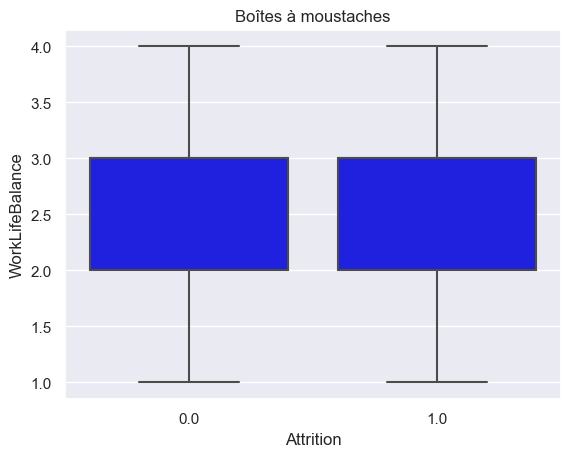

                            OLS Regression Results                            
Dep. Variable:        WorkLifeBalance   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     18.23
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           2.00e-05
Time:                        04:12:07   Log-Likelihood:                -4704.5
No. Observations:                4410   AIC:                             9413.
Df Residuals:                    4408   BIC:                             9426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7820      0.012    240.575      0.0

,sum_sq,df,F,PR(>F)
Attrition,9.019168,1.0,18.232849,0.00002
Residual,2180.487054,4408.0,NaN,NaN


In [642]:
ax = sns.boxplot(x="Attrition", y="WorkLifeBalance", data=Merged_dataCpy, color='blue')
plt.xlabel('Attrition')
plt.ylabel('WorkLifeBalance')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('WorkLifeBalance~Attrition', data=Merged_dataCpy).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Donnée supprimé en fonction des 5% de PR(>F) mais je vais laisser certaines valeurs que qui sont en dessous de 30%.

In [643]:
Merged_dataCpy = Merged_dataCpy.drop(['StockOptionLevel', 'BusinessTravel','JobLevel', 'Education','DistanceFromHome', 'EmployeeID'], axis=1)


Statistique

c:\Users\hadri\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


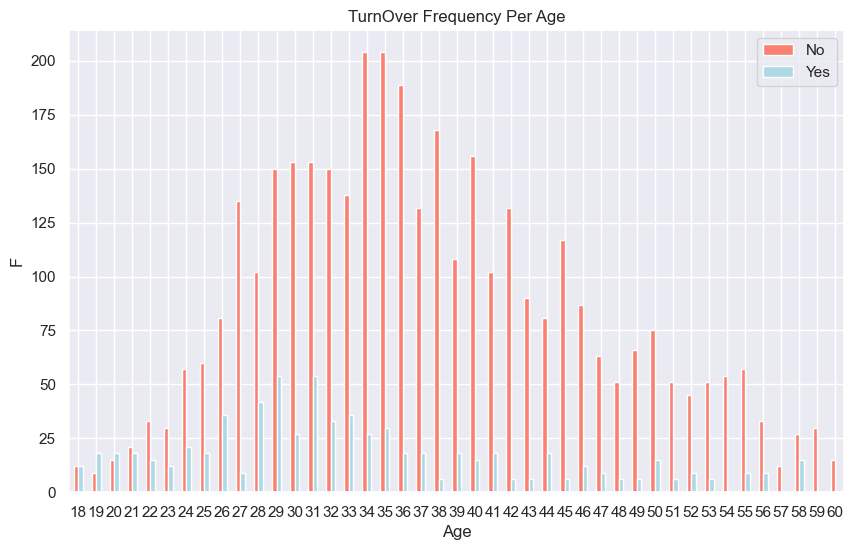

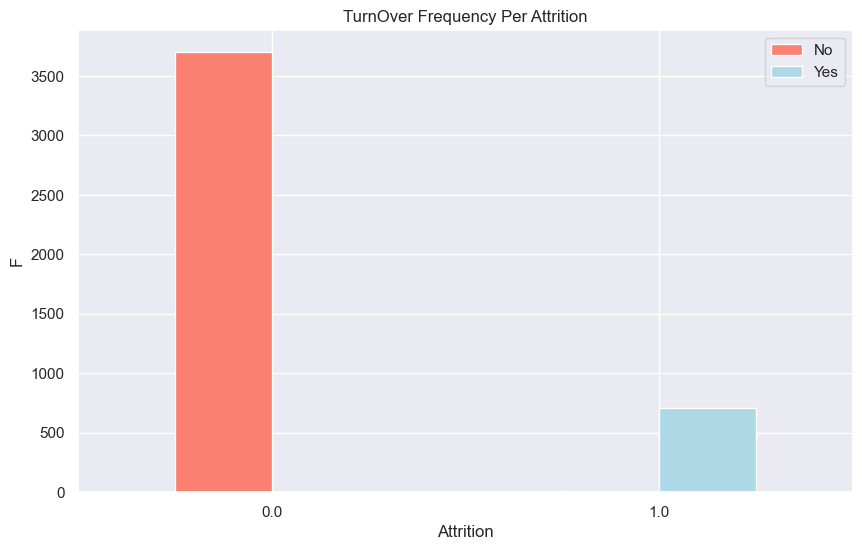

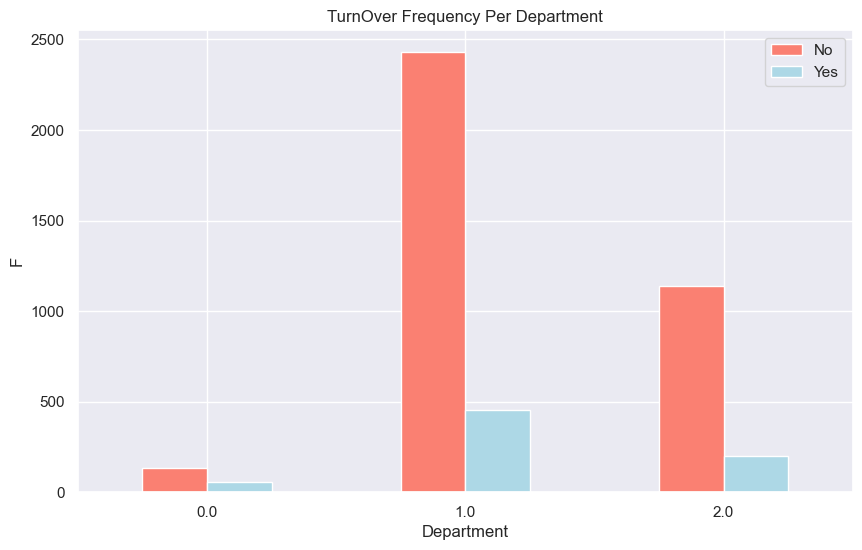

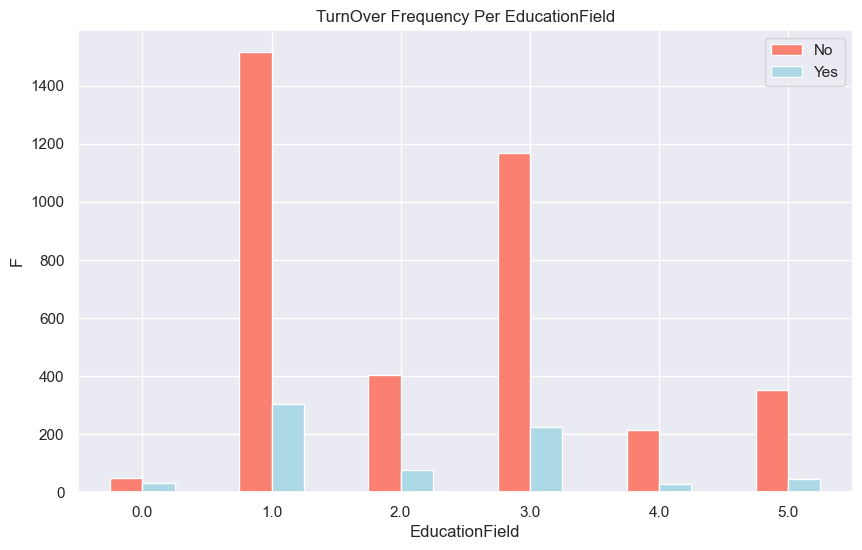

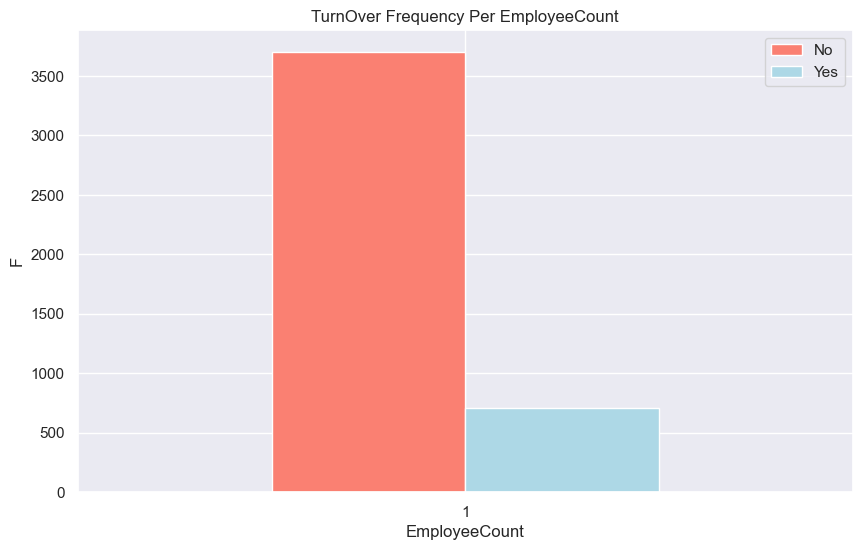

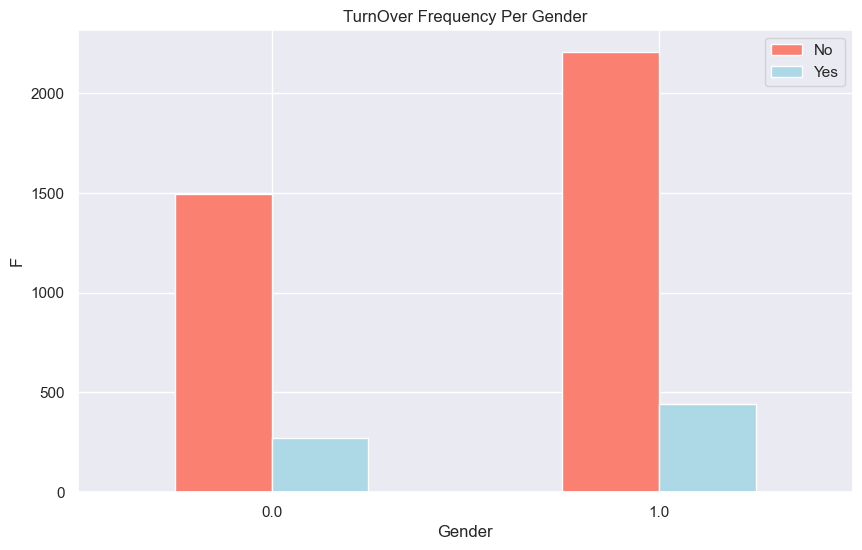

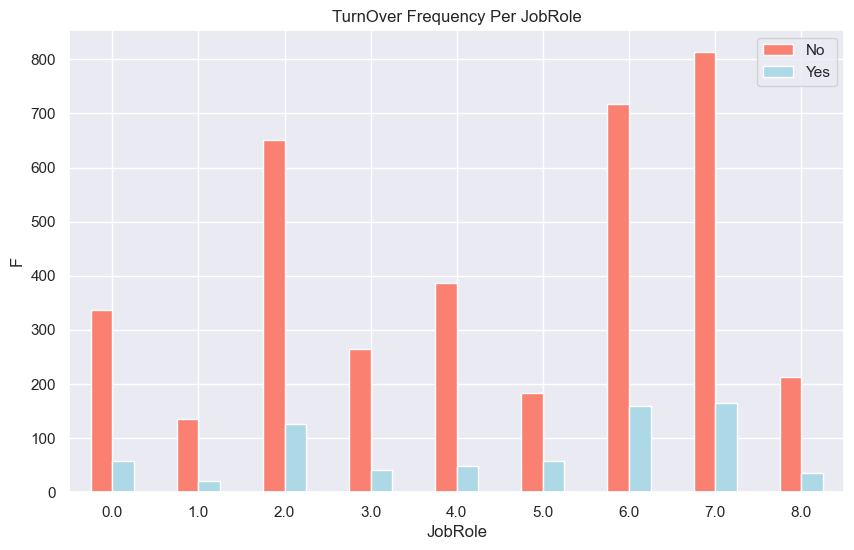

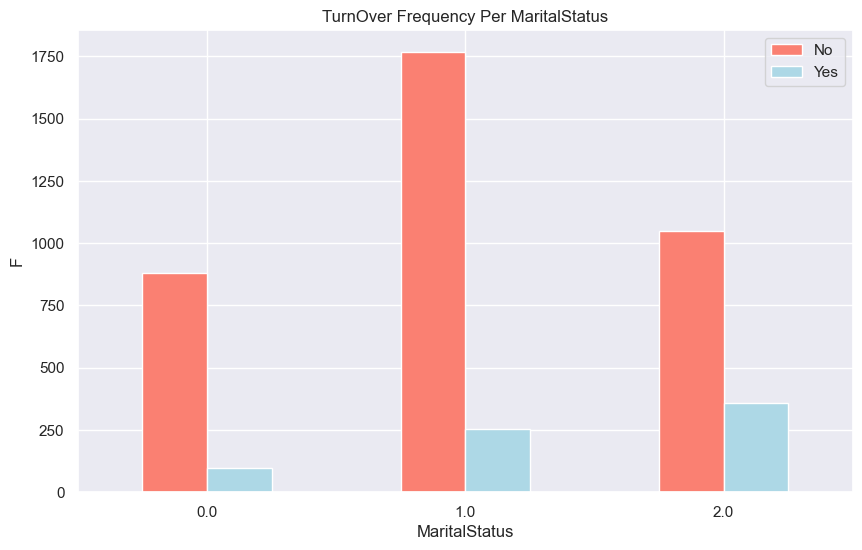

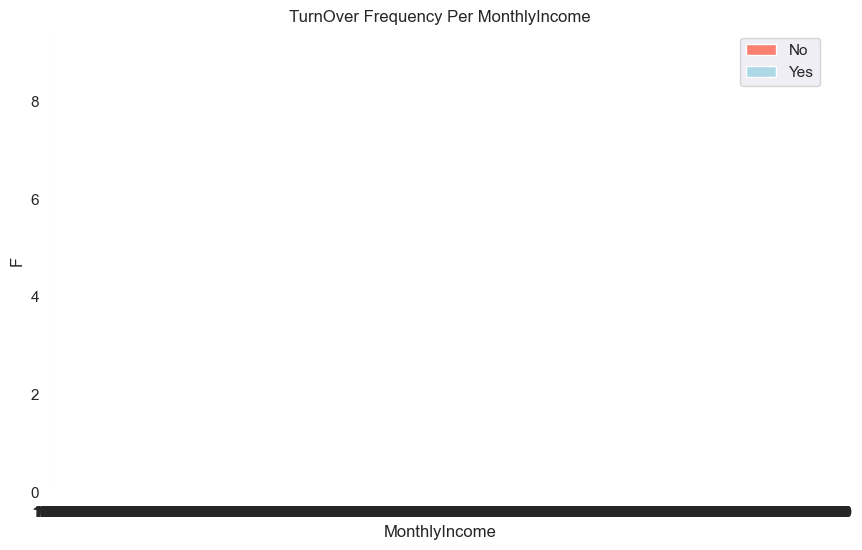

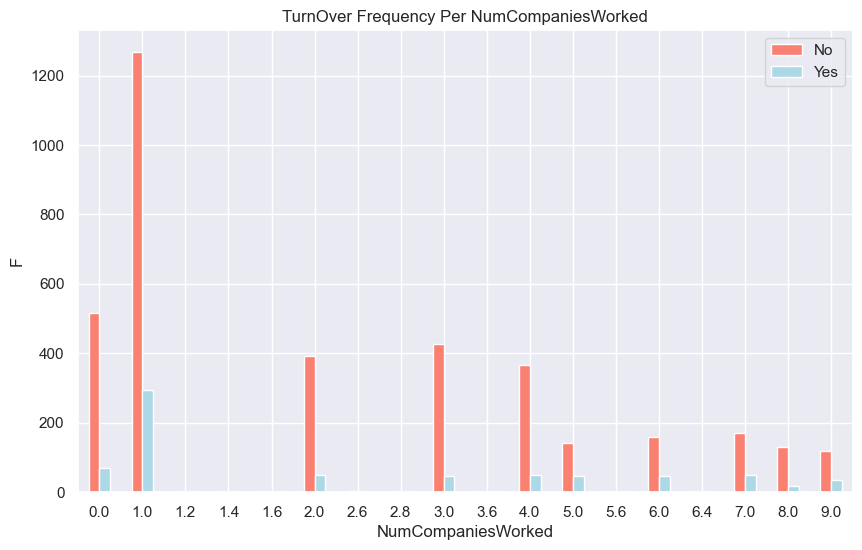

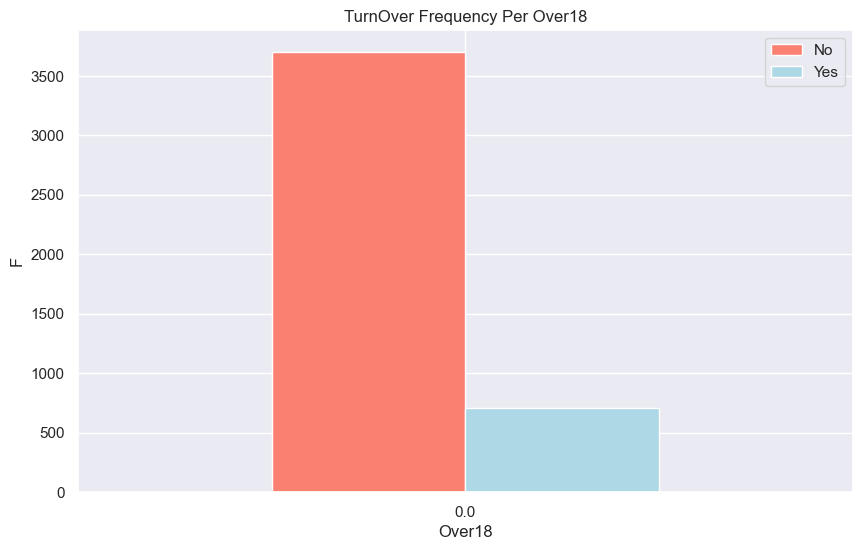

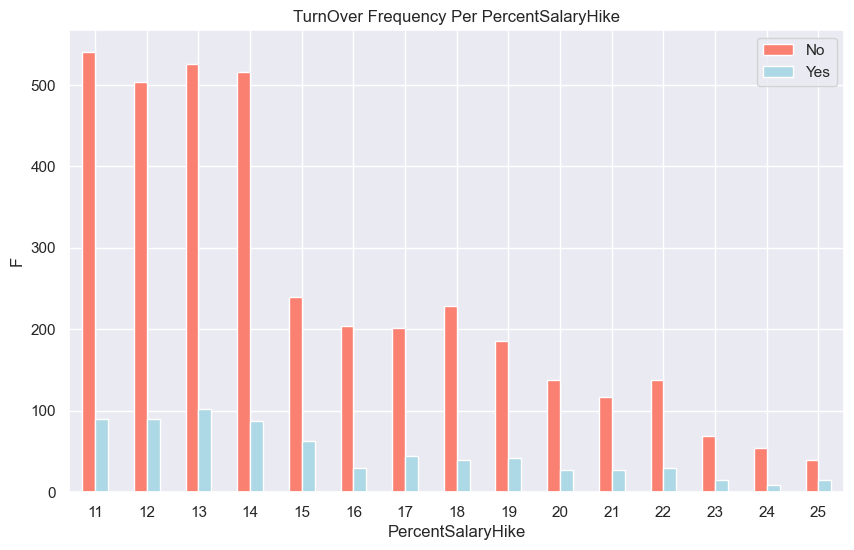

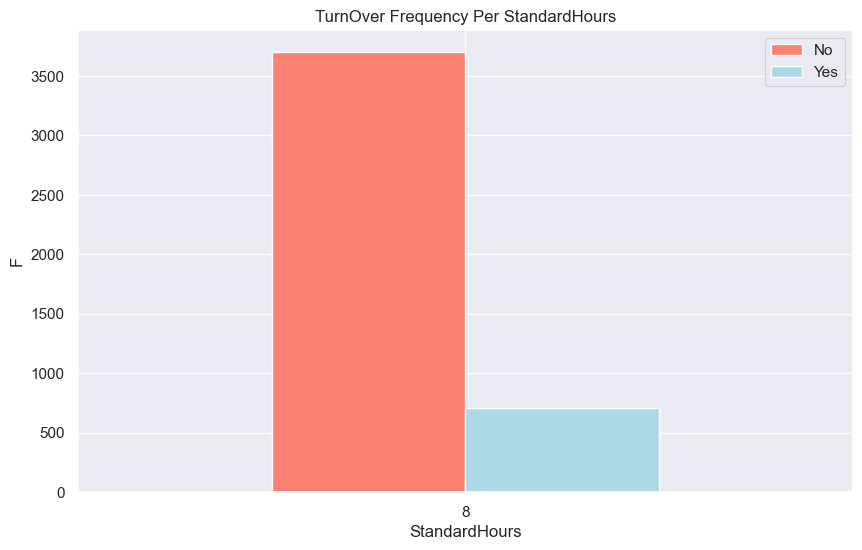

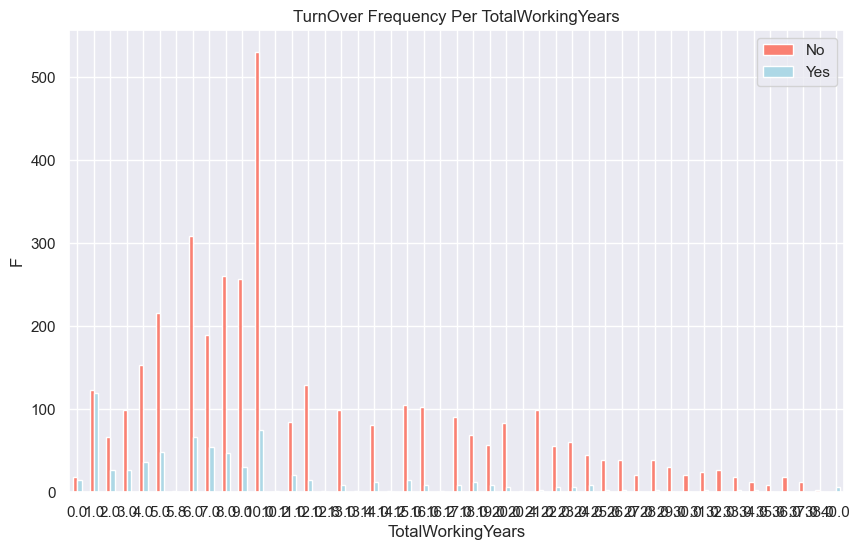

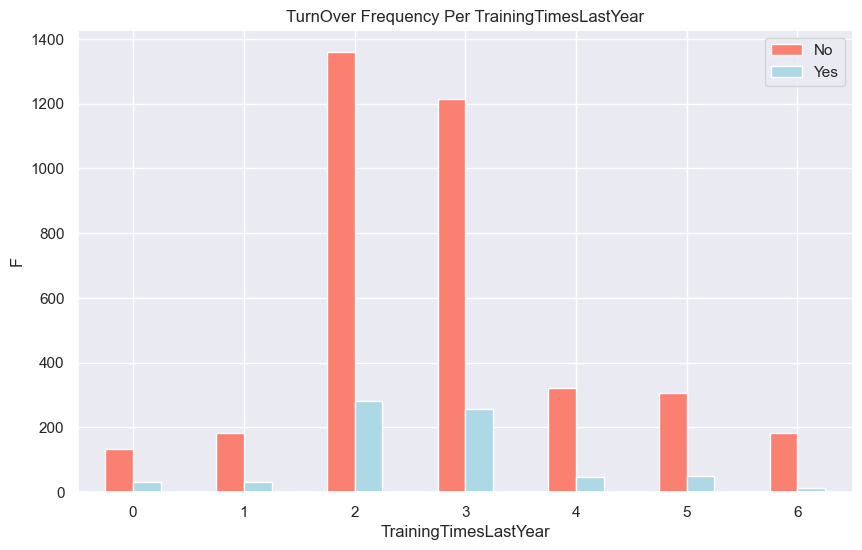

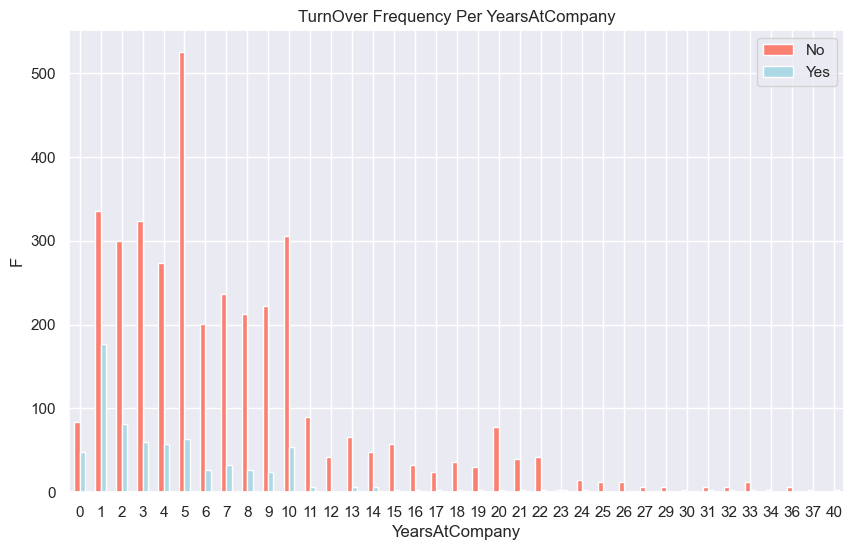

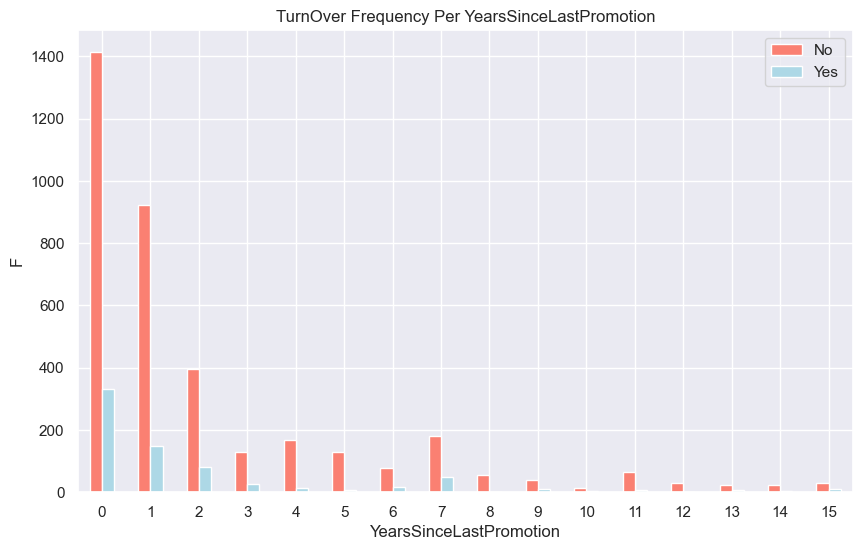

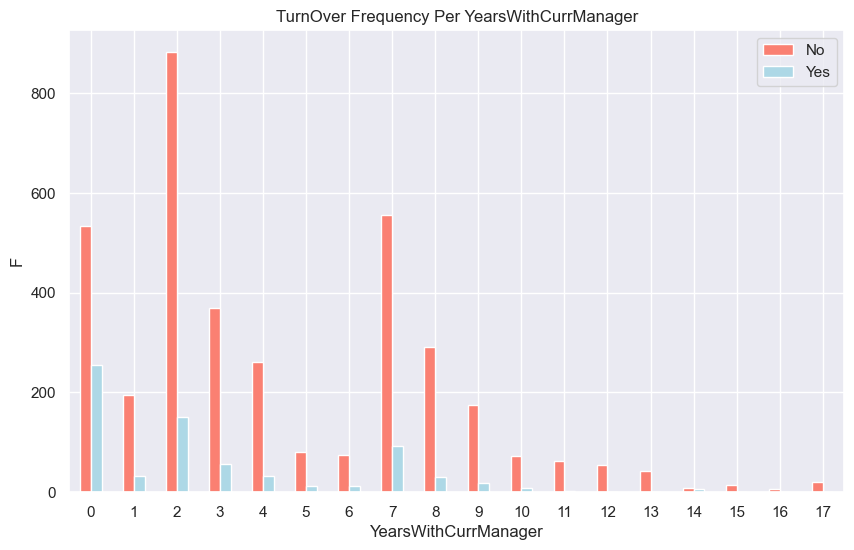

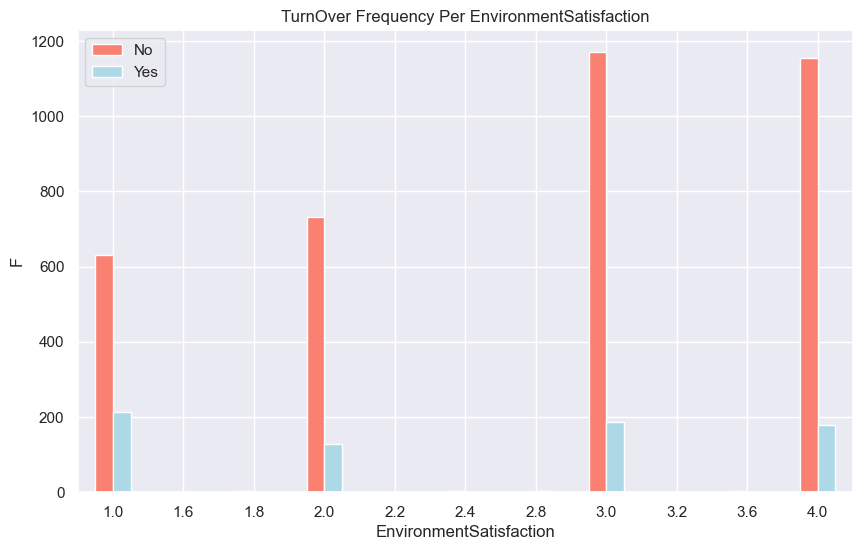

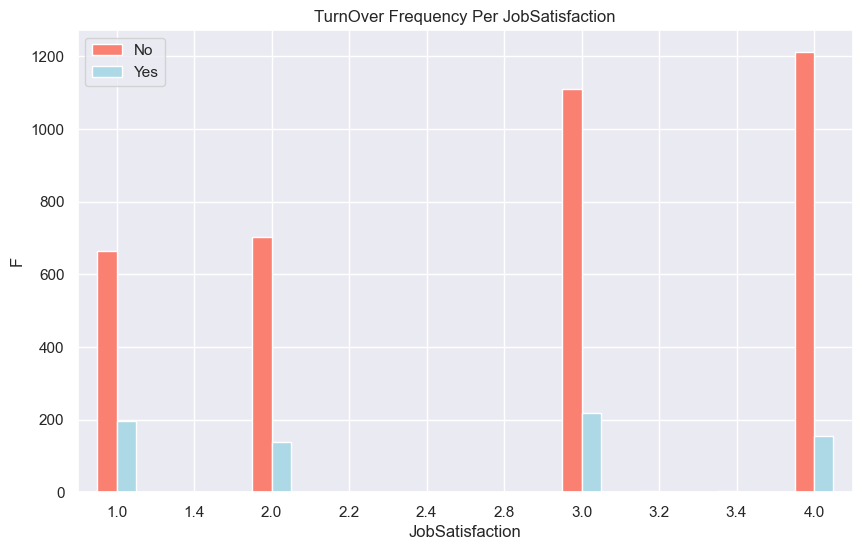

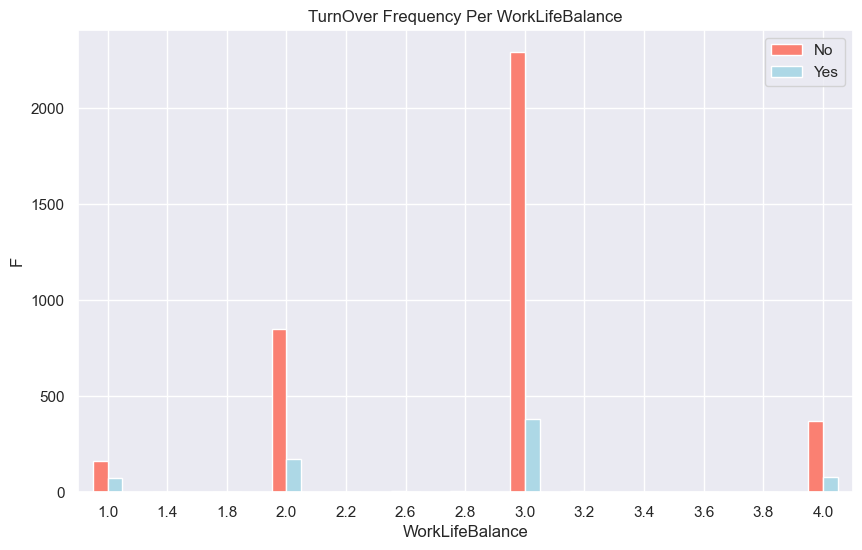

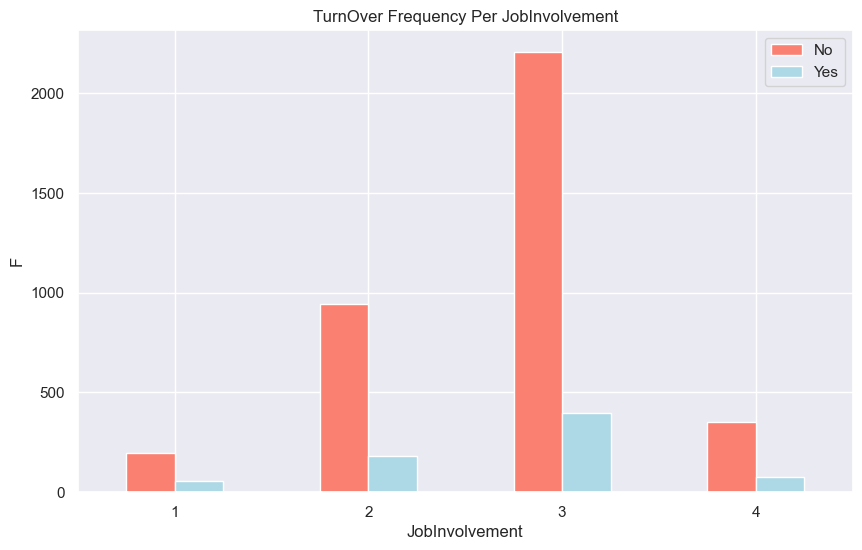

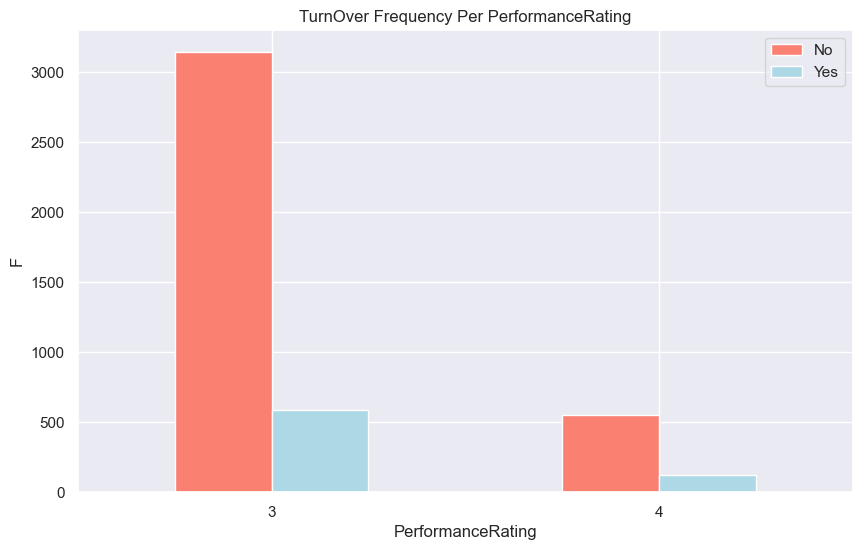

c:\Users\hadri\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


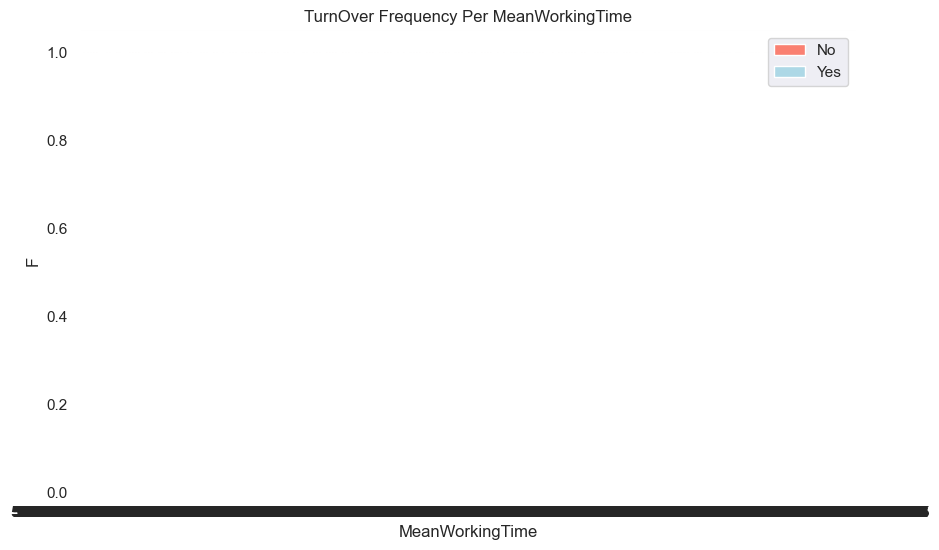

In [644]:
# Visualisation des relations entre chaque feature et la classe recherchée
for col in Merged_dataCpy.select_dtypes({'int64', 'float64','uint8'}) :
    pd.crosstab(Merged_dataCpy[col], Merged_dataCpy.Attrition).plot(kind="bar",
                                       figsize=(10, 6),
                                       color=["salmon", "lightblue"])

    # Plotter les graphes
    plt.title(f"TurnOver Frequency Per {col}")
    plt.xlabel(col)
    plt.ylabel("F")
    plt.legend(["No", "Yes"])
    plt.xticks(rotation=0);

(22.5, -0.5)

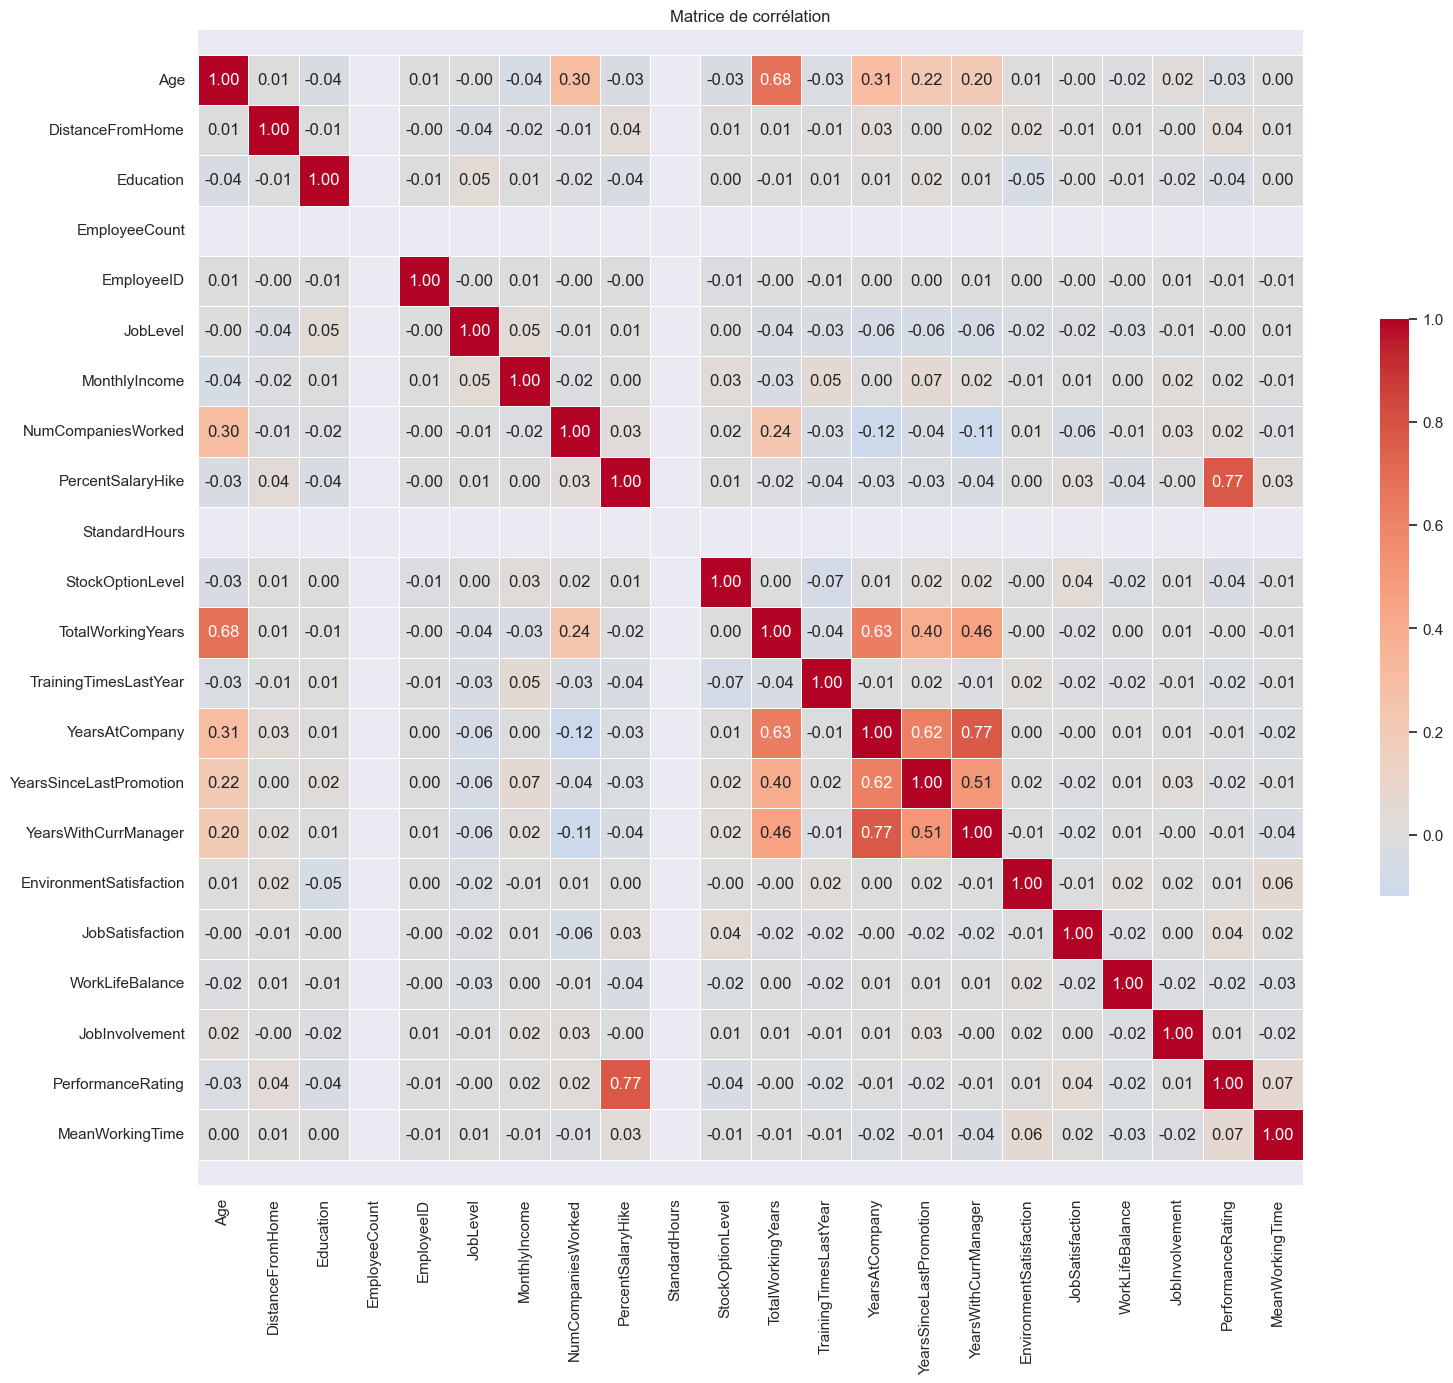

In [723]:
import seaborn as sns
# Calculer et afficher la matrice de corrélation des features
corr_matrix = Merged_data.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="coolwarm",  # Utiliser une colormap plus appropriée
            center=0,  # Définir le centre de la colormap
            square=True,  # Forcer la forme carrée
            cbar_kws={"shrink": .5},  # Réduire la taille de la colorbar
            ax=ax)
ax.set_title("Matrice de corrélation")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Split

In [645]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(Merged_dataCpy, Merged_dataCpy["Attrition"]):
    strat_train_set = Merged_dataCpy.loc[train_index]
    strat_test_set = Merged_dataCpy.loc[test_index]



In [646]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 3465 to 1125
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   Attrition                3528 non-null   float64
 2   Department               3528 non-null   float64
 3   EducationField           3528 non-null   float64
 4   EmployeeCount            3528 non-null   int64  
 5   Gender                   3528 non-null   float64
 6   JobRole                  3528 non-null   float64
 7   MaritalStatus            3528 non-null   float64
 8   MonthlyIncome            3528 non-null   int64  
 9   NumCompaniesWorked       3528 non-null   float64
 10  Over18                   3528 non-null   float64
 11  PercentSalaryHike        3528 non-null   int64  
 12  StandardHours            3528 non-null   int64  
 13  TotalWorkingYears        3528 non-null   float64
 14  TrainingTimesLastYear

### Modèle ML

In [647]:
employee = strat_train_set.drop("Attrition", axis=1)
employee_labels = strat_train_set["Attrition"].copy()

X_test = strat_test_set.drop("Attrition", axis=1)
Y_test = strat_test_set["Attrition"].copy()

## Decision Tree

In [648]:
tree_class = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=5,random_state = 42)
tree_class.fit(employee, employee_labels)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [649]:
employee_predictions = tree_class.predict(employee)

scores = cross_val_predict(tree_class, employee, employee_labels, cv=3)
scores

array([0., 0., 1., ..., 0., 1., 0.])

In [650]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels, scores))
print("Précision :",precision_score(employee_labels, scores))
print("Recall: ",recall_score(employee_labels, scores))
print("f1: ",f1_score(employee_labels, scores))

Matrice de confusion :
 [[2752  207]
 [ 239  330]]
Précision : 0.6145251396648045
Recall:  0.5799648506151143
f1:  0.596745027124774


### Arbre de décision

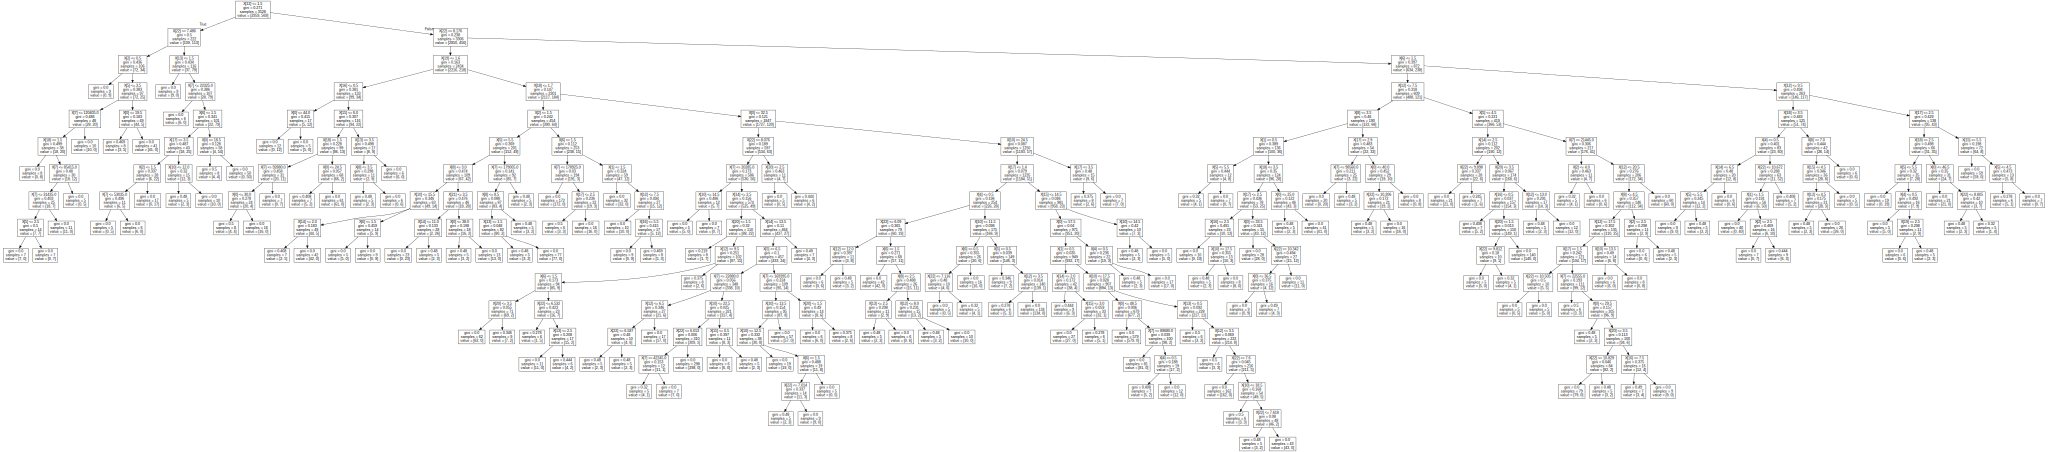

In [654]:

dot_data = tree.export_graphviz(tree_class, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [655]:
dot -Tpng tree.dot -o tree.png    (PNG format)

SyntaxError: invalid syntax (4023811904.py, line 1)

grid search tree decision

In [ ]:
param_grid = [
    # essaye 12 (3×4) combinaisons des hyperparametres
    {'min_samples_split': [3, 10, 30], 'min_samples_leaf': [2, 4, 6, 8]},
    # puis essaye 6 (2×3) combinaisons avec splitter à random (best étant la valeur par défaut)
    {'criterion':["gini", "entropy"] ,'splitter': ["best","random"], 'min_samples_split': [3, 10], 'min_samples_leaf': [2, 3, 4]},
  ]

tree_class = DecisionTreeClassifier(random_state=42)

# 5 sous-jeux de cross-val, ça fait en tout (12+6)*5=90 tours d'entraînement 
grid_search = GridSearchCV(tree_class, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(employee, employee_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'min_samples_leaf': [2, 4, 6, 8],
                          'min_samples_split': [3, 10, 30]},
                         {'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [2, 3, 4],
                          'min_samples_split': [3, 10],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
print("Best paramètres: \n",grid_search.best_params_)
print("Best estimator: \n",grid_search.best_estimator_)

Best paramètres: 
 {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
Best estimator: 
 DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=3, random_state=42)


Colonne supprimée car P value > 5% 

In [ ]:
    employee_train_2 = employee.drop(columns=["EmployeeCount", "Gender","JobRole", "StandardHours","JobInvolvement", "PerformanceRating"])
    employee_labels_train_2 = employee_labels.drop(columns=["EmployeeCount", "Gender","JobRole", "StandardHours","JobInvolvement", "PerformanceRating"])

In [ ]:
tree_class_2 = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 2, min_samples_split= 3, splitter= 'best')

tree_class_2.fit(employee_train_2, employee_labels_train_2)
employee_predictions = tree_class_2.predict(employee_train_2)

scores = cross_val_predict(tree_class, employee_train_2, employee_labels_train_2, cv=5)
scores

array([0., 0., 1., ..., 0., 1., 0.])

In [ ]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels_train_2, scores))
print("Précision :",precision_score(employee_labels_train_2, scores))
print("Recall: ",recall_score(employee_labels_train_2, scores))
print("f1: ",f1_score(employee_labels_train_2, scores))

Matrice de confusion :
 [[2895   64]
 [  59  510]]
Précision : 0.8885017421602788
Recall:  0.8963093145869947
f1:  0.8923884514435695


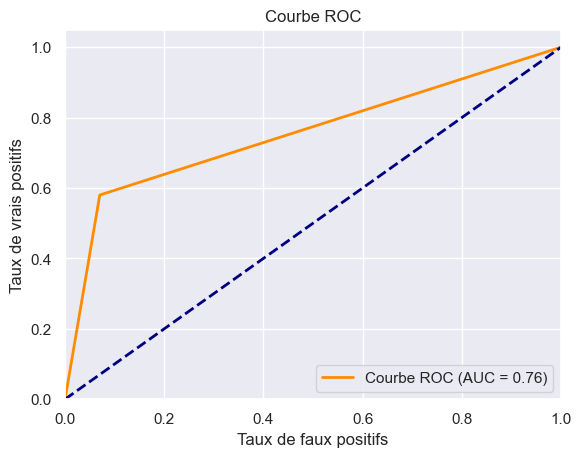

In [685]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(employee_labels_train_2, scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
#plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42, n_estimators=4)

# Entraîner le modèle sur les données d'entraînement
rfc.fit(employee, employee_labels)

RandomForestClassifier(n_estimators=4, random_state=42)

In [ ]:
employee_predictions_rfc = rfc.predict(employee)
# Évaluer le modèle sur les données de test
#accuracy = rfc.score(employee, employee_labels)
#print("Précision :", accuracy)

scores_rfc = cross_val_predict(rfc, employee, employee_labels, cv=3)
scores_rfc

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels, scores_rfc))
print("Précision :",precision_score(employee_labels, scores_rfc))
print("Recall: ",recall_score(employee_labels, scores_rfc))
print("f1: ",f1_score(employee_labels, scores_rfc))

Matrice de confusion :
 [[2936   23]
 [ 223  346]]
Précision : 0.9376693766937669
Recall:  0.6080843585237259
f1:  0.7377398720682303


### Grid search RFC

In [ ]:
# A corriger
rfc = RandomForestClassifier()
# 5 sous-jeux de cross-val, ça fait en tout (12+6)*5=90 tours d'entraînement 
forest_param_grid = [
    {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [10, 20, 40, 50,60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}
  ]

grid_search_rfc = GridSearchCV(rfc, forest_param_grid, cv = 5)
grid_search_rfc.fit(employee, employee_labels)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 20, 40, 50, 60],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [50, 100, 200]}])

In [ ]:
print("Best paramètres: \n",grid_search_rfc.best_params_)
print("Best estimator: \n",grid_search_rfc.best_estimator_)

Best paramètres: 
 {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Best estimator: 
 RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       n_estimators=200)


In [555]:
rfc_2 = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', n_estimators=200)

# Entraîner le modèle sur les données d'entraînement
rfc_2.fit(employee_train_2, employee_labels_train_2)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       n_estimators=200)

In [556]:
employee_predictions_rfc_2 = rfc_2.predict(employee_train_2)
# Évaluer le modèle sur les données de test
#accuracy = rfc.score(employee, employee_labels)
#print("Précision :", accuracy)

scores_rfc_2 = cross_val_predict(rfc_2, employee_train_2, employee_labels_train_2, cv=3)
scores_rfc_2

array([0., 0., 1., ..., 0., 1., 0.])

In [557]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels_train_2, scores_rfc_2))
print("Précision :",precision_score(employee_labels_train_2, scores_rfc_2))
print("Recall: ",recall_score(employee_labels_train_2, scores_rfc_2))
print("f1: ",f1_score(employee_labels_train_2, scores_rfc_2))

Matrice de confusion :
 [[2948   11]
 [ 104  465]]
Précision : 0.976890756302521
Recall:  0.8172231985940246
f1:  0.8899521531100477


Courbe ROC

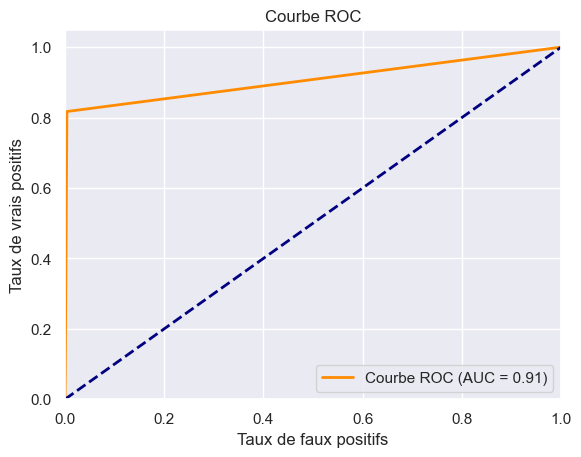

In [684]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(employee_labels_train_2, scores_rfc_2)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
#plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

## Regression Logistique

In [712]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd

In [713]:
# appliquer une régularisation sur le modèle
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(employee,employee_labels)

LogisticRegression(penalty='none', solver='newton-cg')

In [714]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

log_clf = LogisticRegression()
log_clf.fit(employee, employee_labels)

log_predictions = log_clf.predict(X_test)
log_predictions = pd.DataFrame(log_predictions)

accuracy = log_clf.score(employee, employee_labels)
print("Accuracy:", accuracy)

ValueError: X has 23 features, but LogisticRegression is expecting 10 features as input.

In [ ]:
# stockage des données dans .coef_

pd.DataFrame(np.concatenate([modele_logit.intercept_.reshape(-1,1),
                             modele_logit.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(employee.columns)).T

,coef
constante,-0.013192
Age,-0.036983
Department,-0.231549
EducationField,-0.085934
EmployeeCount,-0.013192
Gender,0.117849
JobRole,0.046168
MaritalStatus,0.674919
MonthlyIncome,-0.000001
NumCompaniesWorked,0.120827


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_clf = LogisticRegression(random_state=42)

param_grid = [
    {
        'penalty': ['none', 'l1', 'l2', 'elasticnet'],
        'fit_intercept': [True, False],
        'intercept_scaling': [1,2,10],
        'max_iter': [20,50,100,300],
        'warm_start': [True, False],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
        
    }   
]

grid_search_log = GridSearchCV(log_clf, param_grid, cv=5)
grid_search_log.fit(employee, employee_labels)
print("Best paramètres: \n",grid_search_log.best_params_)
print("Best estimator: \n",grid_search_log.best_estimator_)

c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (st

Best paramètres: 
 {'C': 0.01, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 20, 'penalty': 'l2', 'warm_start': True}
Best estimator: 
 LogisticRegression(C=0.01, max_iter=20, random_state=42, warm_start=True)


c:\Users\hadri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3360 fits failed out of a total of 6720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1680 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hadri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

In [ ]:
scores_log = cross_val_predict(log_clf, employee, employee_labels, cv=3,)
scores_log

array([0, 0, 2, ..., 2, 1, 0])

In [ ]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels, scores_log))
print("Précision :",precision_score(employee_labels, scores_log, average='micro'))
print("Recall: ",recall_score(employee_labels, scores_log, average='micro'))
print("f1: ",f1_score(employee_labels, scores_log, average='micro'))

Matrice de confusion :
 [[1461  188   25]
 [ 139 1488   34]
 [  20   32 1613]]
Précision : 0.9124
Recall:  0.9124
f1:  0.9124


2 train

In [ ]:
log_clf_2 = LogisticRegression(max_iter=20, penalty='l2', random_state=42, warm_start=True, C= 0.01)

log_clf_2.fit(employee_train_2, employee_labels_train_2)

c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, max_iter=20, random_state=42, warm_start=True)

In [ ]:
employee_predictions_log_2 = log_clf_2.predict(employee_train_2)
# Évaluer le modèle sur les données de test
#accuracy = rfc.score(employee, employee_labels)
#print("Précision :", accuracy)

scores_log_2 = cross_val_predict(log_clf_2, employee_train_2, employee_labels_train_2, cv=5)
scores_log_2

c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hadri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels_train_2, scores_log_2))
print("Précision :",precision_score(employee_labels_train_2, scores_log_2, average='micro'))
print("Recall: ",recall_score(employee_labels_train_2, scores_log_2, average='micro'))
print("f1: ",f1_score(employee_labels_train_2, scores_log_2, average='micro'))

Matrice de confusion :
 [[2959    0]
 [ 569    0]]
Précision : 0.838718820861678
Recall:  0.838718820861678
f1:  0.838718820861678


Courbe ROC

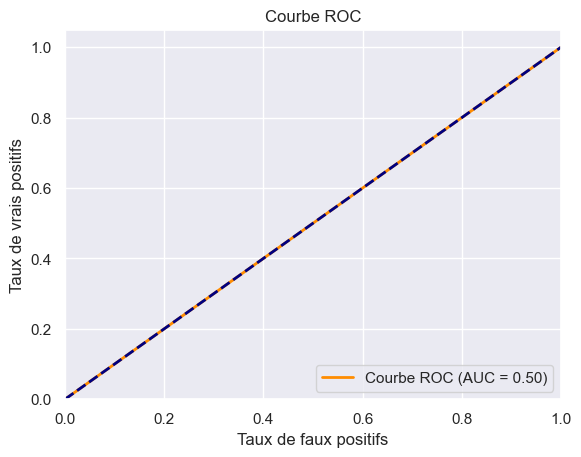

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(employee_labels_train_2, scores_log_2)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
#plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# selectionnement optimal d'un sous ensemble de caractères
from sklearn.feature_selection import RFECV

logistic_reg = logistic_regression

sel = RFECV(estimator=logistic_reg, cv=10, scoring="accuracy")
sel.fit(employee, employee_labels)

employee_logistic_X = employee[employee.columns[sel.support_]]
employee_labels_logistic_X = X_test[X_test.columns[sel.support_]]

In [ ]:
import numpy
log_of_predictions = sel.estimator_.predict(employee_labels_logistic_X)

c:\Users\hadri\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
import numpy as np
#employee_labels = employee_labels.values.reshape(-1, 1)
employee_labels_logistic_X = np.array(employee_labels_logistic_X).reshape(-1, 1)

In [ ]:
import numpy as np

# Generate additional features
additional_features = np.random.rand(employee_labels_logistic_X.shape[0], 15) # generate random features with shape (n_samples, 15)

# Concatenate additional features with employee_labels_logistic_X
for i in range(additional_features.shape[1]):
    employee_labels_logistic_X = np.concatenate((employee_labels_logistic_X, additional_features[:, i].reshape(-1, 1)), axis=1)

print(employee_labels_logistic_X.shape)

(17640, 16)


In [ ]:
employee_labels_logistic_X = employee_labels_logistic_X.astype(float)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
employee_labels_logistic_X = scaler.fit_transform(employee_labels_logistic_X)

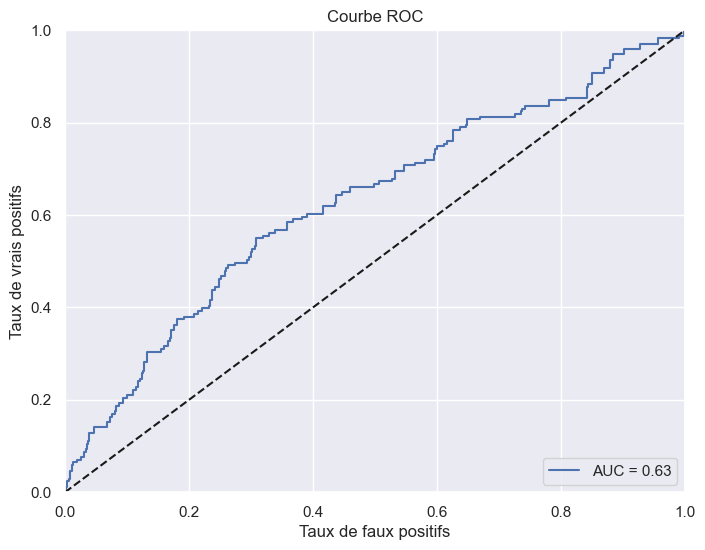

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(employee, employee_labels, test_size=0.3, random_state=42)

# Créer un objet LogisticRegression et entraîner le modèle sur les données d'entraînement
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Faire la prédiction sur les données de test
y_pred_proba = lr.predict_proba(X_test)[:,1]

# Calculer le taux de faux positifs et le taux de vrais positifs
fpr, tpr, seuils = roc_curve(y_test, y_pred_proba)

# Calculer l'aire sous la courbe ROC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

### Perceptron

In [ ]:
import numpy as np

class Perceptron:
    def init(self, input_size, lr=1, epochs=10):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    def fit(self, X, d):
        for epoch in range(self.epochs):
            for i in range(d.shape[0]):
                employee = np.insert(X[i], 0, 1)
                employee_labels = self.predict(X[i])
                e = d[i] - employee_labels
                self.W = self.W + self.lr * e * employee

#X = np.array([[0,0],[0,1],[1,0],[1,1]])
#d = np.array([0,0,0,1])
perceptron = Perceptron()
#perceptron.fit(X, d)
print(perceptron)

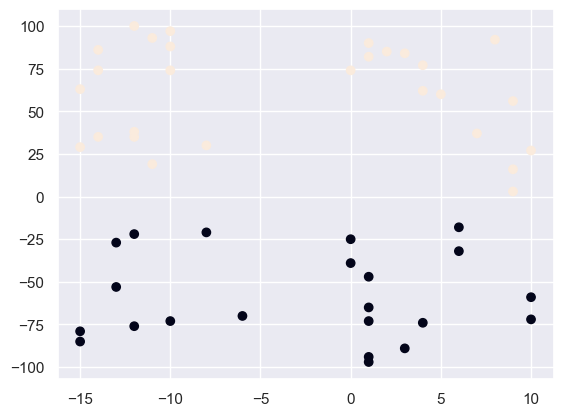

In [ ]:
from random import randint, choice
import numpy as np
import matplotlib.pyplot as plt

nb = 50
employee = [randint(-5, 5) + choice([-10, 5]) for elem in range(nb)]
employee_labels = [randint(-100, 100) for elem in range(nb)]

x = [1 if elem > 0 else -1 for elem in employee_labels]

plt.scatter(employee, employee_labels, c=x)
plt.show()

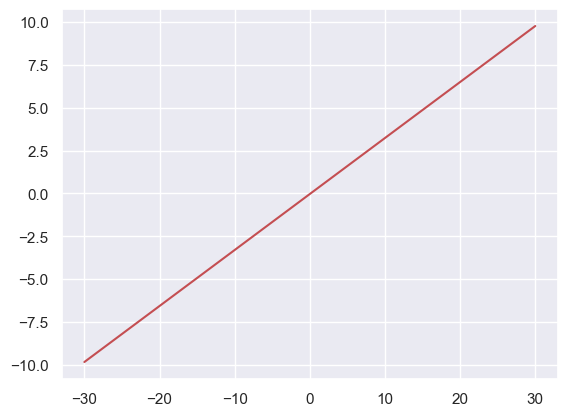

In [ ]:
W = np.array([0, 0, 0])

bool = True

while bool:
    for i in range(len(x)):
        Xi = np.array([1, employee[i], employee_labels[i]], float)

        if employee_labels[i] * np.dot(W, Xi) <= 0:
            for i2 in range(len(W)):
                W[i2] += employee_labels[i] * Xi[i2]

            bool = False

    bool = not(bool)

nb = 30
a = linspace(-nb, nb, nb * 2 + 1)
employee_labels = -W[0]/W[2] + ((-W[1] * a) / W[2])

plt.plot(a, employee_labels, 'r')
plt.show()

#print(a)

Perceptron

In [716]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

perceptron = Perceptron(tol=1e-3, random_state=42)
perceptron.fit(employee, employee_labels)


Perceptron(random_state=42)

In [717]:
scores_perceptron = cross_val_predict(perceptron, employee, employee_labels, cv=3,)
scores_perceptron

array([1, 1, 0, ..., 0, 0, 0])

In [718]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels, scores_perceptron))
print("Précision :",precision_score(employee_labels, scores_perceptron, average='micro'))
print("Recall: ",recall_score(employee_labels, scores_perceptron, average='micro'))
print("f1: ",f1_score(employee_labels, scores_perceptron, average='micro'))

Matrice de confusion :
 [[1172  179  325]
 [ 149 1494   20]
 [ 111  116 1434]]
Précision : 0.82
Recall:  0.82
f1:  0.82


In [719]:
perceptron = Perceptron(random_state=42)

param_grid = [
    {
        'penalty': ['none', 'l1', 'l2', 'elasticnet'],
        'fit_intercept': [True, False],
        'max_iter': [20,50,100,300],
        'warm_start': [True, False],
       
        
    }   
]

grid_search_perceptron = GridSearchCV(perceptron, param_grid, cv=5)
grid_search_perceptron.fit(employee, employee_labels)
print("Best paramètres: \n",grid_search_perceptron.best_params_)
print("Best estimator: \n",grid_search_perceptron.best_estimator_)

Best paramètres: 
 {'fit_intercept': True, 'max_iter': 50, 'penalty': 'l1', 'warm_start': True}
Best estimator: 
 Perceptron(max_iter=50, penalty='l1', random_state=42, warm_start=True)


In [720]:
perceptron_2 = Perceptron( max_iter=50, penalty='l1', random_state=42, warm_start=True)
perceptron_2.fit(employee_train_2, employee_labels_train_2)
scores_perceptron_2 = cross_val_predict(perceptron_2, employee_train_2, employee_labels_train_2, cv=3,)
scores_perceptron_2

array([0., 0., 0., ..., 0., 0., 0.])

In [721]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels_train_2, scores_perceptron_2))
print("Précision :",precision_score(employee_labels_train_2, scores_perceptron_2, average='micro'))
print("Recall: ",recall_score(employee_labels_train_2, scores_perceptron_2, average='micro'))
print("f1: ",f1_score(employee_labels_train_2, scores_perceptron_2, average='micro'))

Matrice de confusion :
 [[2959    0]
 [ 569    0]]
Précision : 0.838718820861678
Recall:  0.838718820861678
f1:  0.838718820861678


Courbe roc

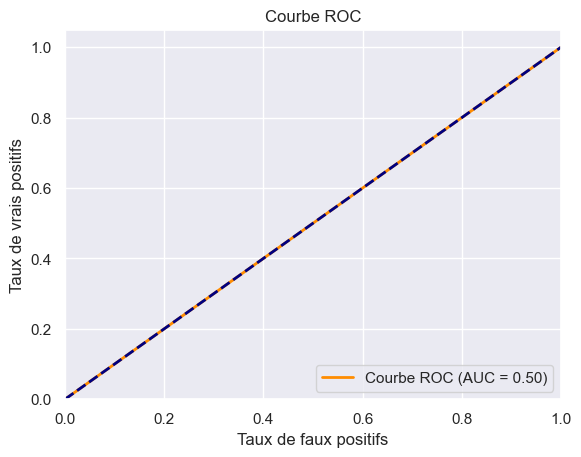

In [722]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(employee_labels_train_2, scores_perceptron_2)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
#plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()






## Support Vector Classifier SVC

Dans cette implémentation de SVM, la fonction fit effectue l'entraînement du modèle sur les données d'entrée X et les étiquettes de classe y. Les poids du modèle sont ajustés en utilisant l'algorithme SMO (Sequential Minimal Optimization) pour trouver les multiplicateurs de Lagrange qui définissent le modèle SVM.

A voir pour trouver un code plus simple 

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [ ]:
employee, employee_labels = make_classification(n_samples=5000, n_features=10,
                                                n_classes=3,
                                                n_clusters_per_class=1)
svc = make_pipeline(StandardScaler(), LinearSVC(random_state=42 , tol=1e-5))
svc.fit(employee, employee_labels)


c:\Users\hadri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42, tol=1e-05))])

In [ ]:
scores_svc = cross_val_predict(svc, employee, employee_labels, cv=3,)
scores_svc

c:\Users\hadri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hadri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
print("Matrice de confusion :\n",confusion_matrix(employee_labels, scores_svc))
print("Précision :",precision_score(employee_labels, scores_svc, average='micro'))
print("Recall: ",recall_score(employee_labels, scores_svc, average='micro'))
print("f1: ",f1_score(employee_labels, scores_svc, average='micro'))

Matrice de confusion :
 [[1367   94  215]
 [ 173 1484    6]
 [  86   87 1488]]
Précision : 0.8678
Recall:  0.8678
f1:  0.8678000000000001


In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

svc = LinearSVC()
param_grid = [
    {
    'penalty': [ 'l1', 'l2'],
        'fit_intercept': [True, False],
        'intercept_scaling': [1,2,10],
        'max_iter': [20,50,100,300],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
  ]

grid_search_svc = GridSearchCV(svc, param_grid, cv = 5)
grid_search_svc.fit(employee, employee_labels)
print("Best paramètres: \n",grid_search_svc.best_params_)
print("Best estimator: \n",grid_search_svc.best_estimator_)



Best paramètres: 
 {'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 10, 'max_iter': 100, 'penalty': 'l2'}
Best estimator: 
 LinearSVC(C=0.1, intercept_scaling=10, max_iter=100)


In [ ]:
svc_2 = make_pipeline(StandardScaler(), LinearSVC(C=0.1, intercept_scaling=10, max_iter=100))
svc_2.fit(employee_train_2, employee_labels_train_2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.1, intercept_scaling=10, max_iter=100))])

In [ ]:
scores_svc_2 = cross_val_predict(svc_2, employee_train_2, employee_labels_train_2, cv=3,)
scores_svc_2

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:

print("Matrice de confusion :\n",confusion_matrix(employee_labels_train_2, scores_svc_2))
print("Précision :",precision_score(employee_labels_train_2, scores_svc_2))
print("Recall: ",recall_score(employee_labels_train_2, scores_svc_2))
print("f1: ",f1_score(employee_labels_train_2, scores_svc_2))

Matrice de confusion :
 [[2934   25]
 [ 498   71]]
Précision : 0.7395833333333334
Recall:  0.12478031634446397
f1:  0.2135338345864662


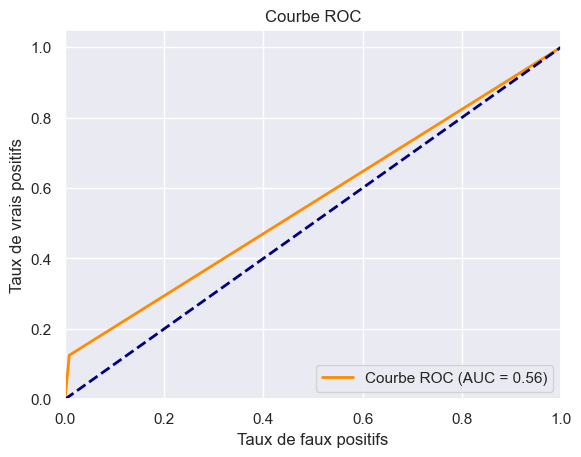

In [ ]:
fpr, tpr, thresholds = roc_curve(employee_labels_train_2, scores_svc_2)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
#plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

## Conclusion

Il faut savoir que le choix de la technique la plus appropriée dépend beaucoup du **type de problème à résoudre**.

Certains problèmes nécessitent plus d'explicabilité que d'autres. Par exemple, lorsque vous avez un modèle qui prend beaucoup d'informations personnelles, il est bon de savoir quel type d'informations personnelles le modèle utilise et comment le modèle utilise ces fonctionnalités pour arriver à ses conclusions. Dans ce cas, nous devrions privilégier l'explicabilité à la précision.

Avec l'utilisation du deep learning, les modèles utilisés dans ces applications sont devenus encore plus complexes. En fait, ils sont si complexes que dans de nombreux cas, nous n'avons aucune idée de la manière dont ces modèles d'IA prennent leurs décisions.

<div>
<img src="algos.png" width="1000"/>
</div>

*Figure : Performance d'apprentissage contre quelques compromis d'explicabilité pour plusieurs catégories de techniques d'apprentissage / Learning Performance Versus Explainability Trade-Off for Several Categories of Learning Techniques (source : DARPA’s Explainable Artificial Intelligence Program - David Gunning, D. Aha. 2019)*

<div>
<img src="accuracy_exp.png" width="800"/>
</div>

*Figure : Précision vs explicabilité / Accuracy vs Explainability (source : Explainable Artificial Intelligence (XAI) - Alexandre Duval. 2019)*

<div>
<img src="new_approach.png" width="1000"/>
</div>

*Figure : Stratégies de développement de modèles explicables / Strategies for Developing Explainable Models (source : DARPA’s Explainable Artificial Intelligence Program - David Gunning, D. Aha. 2019)*

In [ ]:
X_test = X_test.drop(columns=["EmployeeCount", "Gender","JobRole", "StandardHours","JobInvolvement", "PerformanceRating"])
Y_test = Y_test.drop(columns=["EmployeeCount", "Gender","JobRole", "StandardHours","JobInvolvement", "PerformanceRating"])


In [ ]:
tree_class_test = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 2, min_samples_split= 3, splitter= 'best')
tree_class_test.fit(X_test, Y_test)
employee_predictions = tree_class_test.predict(Y_test)

ValueError: Number of labels=882 does not match number of samples=1059

In [ ]:
scores = cross_val_predict(tree_class_test, X_test, Y_test, cv=5)
scores

ValueError: Found input variables with inconsistent numbers of samples: [1059, 882]

In [ ]:
print("Matrice de confusion :\n",confusion_matrix(Y_test, scores))
print("Précision :",precision_score(Y_test, scores))
print("Recall: ",recall_score(Y_test, scores))
print("f1: ",f1_score(Y_test, scores))